In [1]:
import numpy as np
import matplotlib.pyplot as plt

Was ist Maschinelles Lernen?

Zur Orientierung Überblick über die Arten des maschinellen Lernens.

Verschiedene Arten des Lernens sind für verschiedene Problemstellungen geeignet, beziehungsweise stellen verschiedene Anforderungen an die Trainingsdaten

Überwachtes Lernen - Training auf gelabelten Daten - Beispiel : Klassifikation (Einteilung in Klassen) und Regression (Vorhersage von Werten aufgrund von Prädiktoren - f(x, y, ...) durch die Variablen x, y, etc) mit Bildern

Unüberwachtes Lernen - Computer teilen Daten ohne Überwachung in Gruppen ein - Beispiel K-Means Clustering mit Bildern (Wortembedding - Clustering von ähnlichen Begriffen
 

Verstärkendes Lernen - Computer versucht Belohnung für das Verhalten eines Agenten zu maximieren

Überwachtes Lernen am verbreitetsten, im Kurs exemplarisch verwendet

Einfachstes Beispiel eines neuronalen Netzwerks: das Perzeptron

**[Künstliche neuronale Netzwerke](https://de.wikipedia.org/wiki/K%C3%BCnstliches_neuronales_Netz)** gehen in ihrer konzeptionellen Grundlagen auf die Arbeit von [Warren McCulloch](https://de.wikipedia.org/wiki/Warren_McCulloch) und [Walter Pitts](https://de.wikipedia.org/wiki/Walter_Pitts) zurück, die bereits $1943$ in Analogie zu Neuronen verknüpfte Netzwerke zur räumlichen Mustererkennung vorschlugen. $1958$ gelang [Frank Rosenblatt et al.](https://de.wikipedia.org/wiki/Frank_Rosenblatt) in Form des **[Perzeptrons](https://de.wikipedia.org/wiki/Perzeptron)** die erste praktische Umsetzung eines neuronalen Netzwerks. $1969$ führte die Kritik von [Marvin Minsky](https://de.wikipedia.org/wiki/Marvin_Minsky) an der Unfähigkeit, mit einfachen Perzeptrons nicht linear separierbare Probleme (wie zum Beispiel beim **[XOR-Problem](https://de.wikipedia.org/wiki/Exklusiv-Oder-Gatter)**)  zu lösen, zu einem zeitweisen Rückgang des Forschungsinteresses (dem sogenannten KI-Winter) ({cite:t}`Sonnet.2022`, s.25 ). Dies änderte sich in den $1980$er Jahren, als durch verschiedene Fortschritte in der KI-Forschung wie zum Beispiel der Methode der **[Backpropagation](https://de.wikipedia.org/wiki/Backpropagation)** gezeigt werden konnte, dass mehrschichtige Perzeptrons auch in der Lage sind, nicht linear separierbare Probleme zu bewältigen. 

Wir haben an anderer Stelle im Einzelnen über die verschiedenen Arten des maschinellen Lernens - das **[unüberwachte Lernen](https://de.wikipedia.org/wiki/Un%C3%BCberwachtes_Lernen)**, **[überwachte Lernen](https://de.wikipedia.org/wiki/%C3%9Cberwachtes_Lernen)** und **[bestärkende Lernen](https://de.wikipedia.org/wiki/Best%C3%A4rkendes_Lernen)** - gesprochen. Wir haben verschiedene Machine-Learning-Algorithmen vorgestellt, die bei den unterschiedlichen Lernarten zum Einsatz kommen. Neuronale Netze zeichnen sich insbesondere dadurch aus, dass sie bei entsprechender Vorbereitung in allen drei Arten des Lernens erfolgreich eingesetzt werden können. Diese universelle Verwendbarkeit erklärt auch den vermehrten Einsatz von künstlichen neuronalen Netzwerken in unterschiedlichsten Bereichen ({cite:t}`Sonnet.2022`, s.12 ).

In diesem Kapitel werden wir uns mit den Stärken und Schwächen von **neuronalen Netzwerken** sowie deren Einsatzmöglichkeiten und der zugrunde liegenden mathematischen Formulierung beschäftigen.

Um **künstliche neuronale Netzwerke** in `Python` umzusetzen, werden wir in diesem Kapitel auf `Keras` zurückgreifen.
`Keras` ist eine High Level API für das Erstellen und Trainieren von **künstlichen neuronalen Netzwerken** (*engl. Artificial Neural Network - ANN*).

Es wurde ursprünglich als eigenständiges **Deep-Learning-Framework** entwickelt und später in `TensorFlow` integriert. `Keras` zeichnet sich im Gegensatz zu anderen Deep-Learning-Frameworks wie zum Beispiel `TensorFlow` und `PyTorch` durch seine einfache und benutzerfreundliche Schnittstelle aus, die es Entwicklern ermöglicht, neuronale Netzwerke schnell und effizient zu entwerfen, anzupassen und zu trainieren.

`Keras` bietet eine Vielzahl von vorgefertigten Schichttypen und Modellarchitekturen, die es einfach machen, komplexe neuronale Netzwerke zu erstellen, ohne tief in die Implementierungsdetails eintauchen zu müssen. Mehr zu `Keras` erfahren Sie **[hier](https://keras.io/guides/)**.

## Grundlegende Struktur von künstlichen neuronalen Netzwerken

BILD: Nervenzelle

<img src="./images/perceptron.png" alt="drawing" width="80%"/>

Die Struktur von **künstlichen neuronalen Netzwerken** folgt im Grundprinzip dem Aufbau eines **biologischen Nervensystems**. In neuronalen Netzwerken entsprechen Neuronen den **[künstlichen Neuronen](https://de.wikipedia.org/wiki/K%C3%BCnstliches_Neuron)** oder Knoten im Netzwerk. Diese Neuronen sind die grundlegenden Verarbeitungseinheiten. 

Künstliche neuronale Netzwerke bestehen aus einzelnen Neuronen die in sogenannten Schichten (*engl. Layers*) angeordnet sind. Dabei besteht die erste Schicht (*engl. Input Layer*) aus den Eingabewerten, gefolgt von weiteren Schichten von Neuronen, den sogenannten *Hidden Layers* und schließlich einer Ausgabeschicht (*engl. Output Layer*).

In Analogie zu biologischen Neuronen, die durch Anregung über einen gewissen Grenzwert aktiviert werden, Reize weiterzuleiten, wird bei neuronalen Netzwerken die gewichtete Summe der Inputs an verbundene Neuronen weitergegeben. Bezogen auf ein Neuron ergibt sich:

$$ \text{Input} = \sum_{i=1}^N x_i w_i $$

Dabei sind die $x_i$ die einzelnen Eingabewerte und die $w_i$ die jeweiligen Gewichtungen der $N$ Inputs.

Im Äquivalent zu der biologischen Schwelle, ab der ein Neuron aktiviert wird, um ein Signal weiterzuleiten, können wir einen Schwellenwert $b$ hinzufügen, den sogenannten Bias.

$$ \text{Input} = \sum_{i=1}^N x_i w_i + b$$

Diese gewichtete Summe geht in die gewählte Aktivierungsfunktion ein. Diese Funktion bildet die gewichtete Summe der Eingabewerte auf einen bestimmten Wertebereich ab und dient dazu, die Ausgabe eines Neurons oder einer Schicht zu steuern. Sie entscheidet, ob und in welchem Maße ein Neuron aktiviert wird und welche Informationen an die nächsten Schichten weitergegeben werden. Im Weiterern ermöglichen geeignete Aktivierungsfunktionen, auch nicht lineare Zusammenhänge zu beschreiben. Auf die genaue Form von verschiedenen Aktivierungsfunktionen werden wir später zurückkommen und gehen für den Moment von einer **[Heaviside-Sprungfunktion](https://de.wikipedia.org/wiki/Heaviside-Funktion)** als Aktivierungsfunktion aus, was in Bezug auf biologischen System dem **[Alles-oder-nichts-Gesetz](https://de.wikipedia.org/wiki/Alles-oder-nichts-Gesetz)** entspricht.

$$f_{\text{Aktiv}}(\text{Input}) = f_{\text{Aktiv}}(\sum_{i=1}^N x_i w_i + b) \begin{cases}
1 & \sum_{i=1}^N x_i w_i + b \ge 0, \\ 0 & \text{sonst}
\end{cases} $$

Erwähnt sei, dass die Heaviside-Sprungfunktion, die in diesem Beispiel nur zur Veranschaulichung des Grundprinzips von neuronalen Netzwerken zum Einsatz kommt, in der Praxis oft keine geeignete Wahl für eine Aktivierungsfunktion darstellt, da sie nicht **[stetig differenzierbar](https://de.wikipedia.org/wiki/Differenzierbarkeit#Stetige_Differenzierbarkeit_und_h%C3%B6here_Ableitungen)** ist und daher bestimmte Optimierungsverfahren wie zum Beispiel das **[Stochastic-Gradient-Descent-Verfahren](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)**, nicht angewendet werden können.

In der folgenden Abbildung ist die **Heaviside-Sprungfunktion** dargestellt.

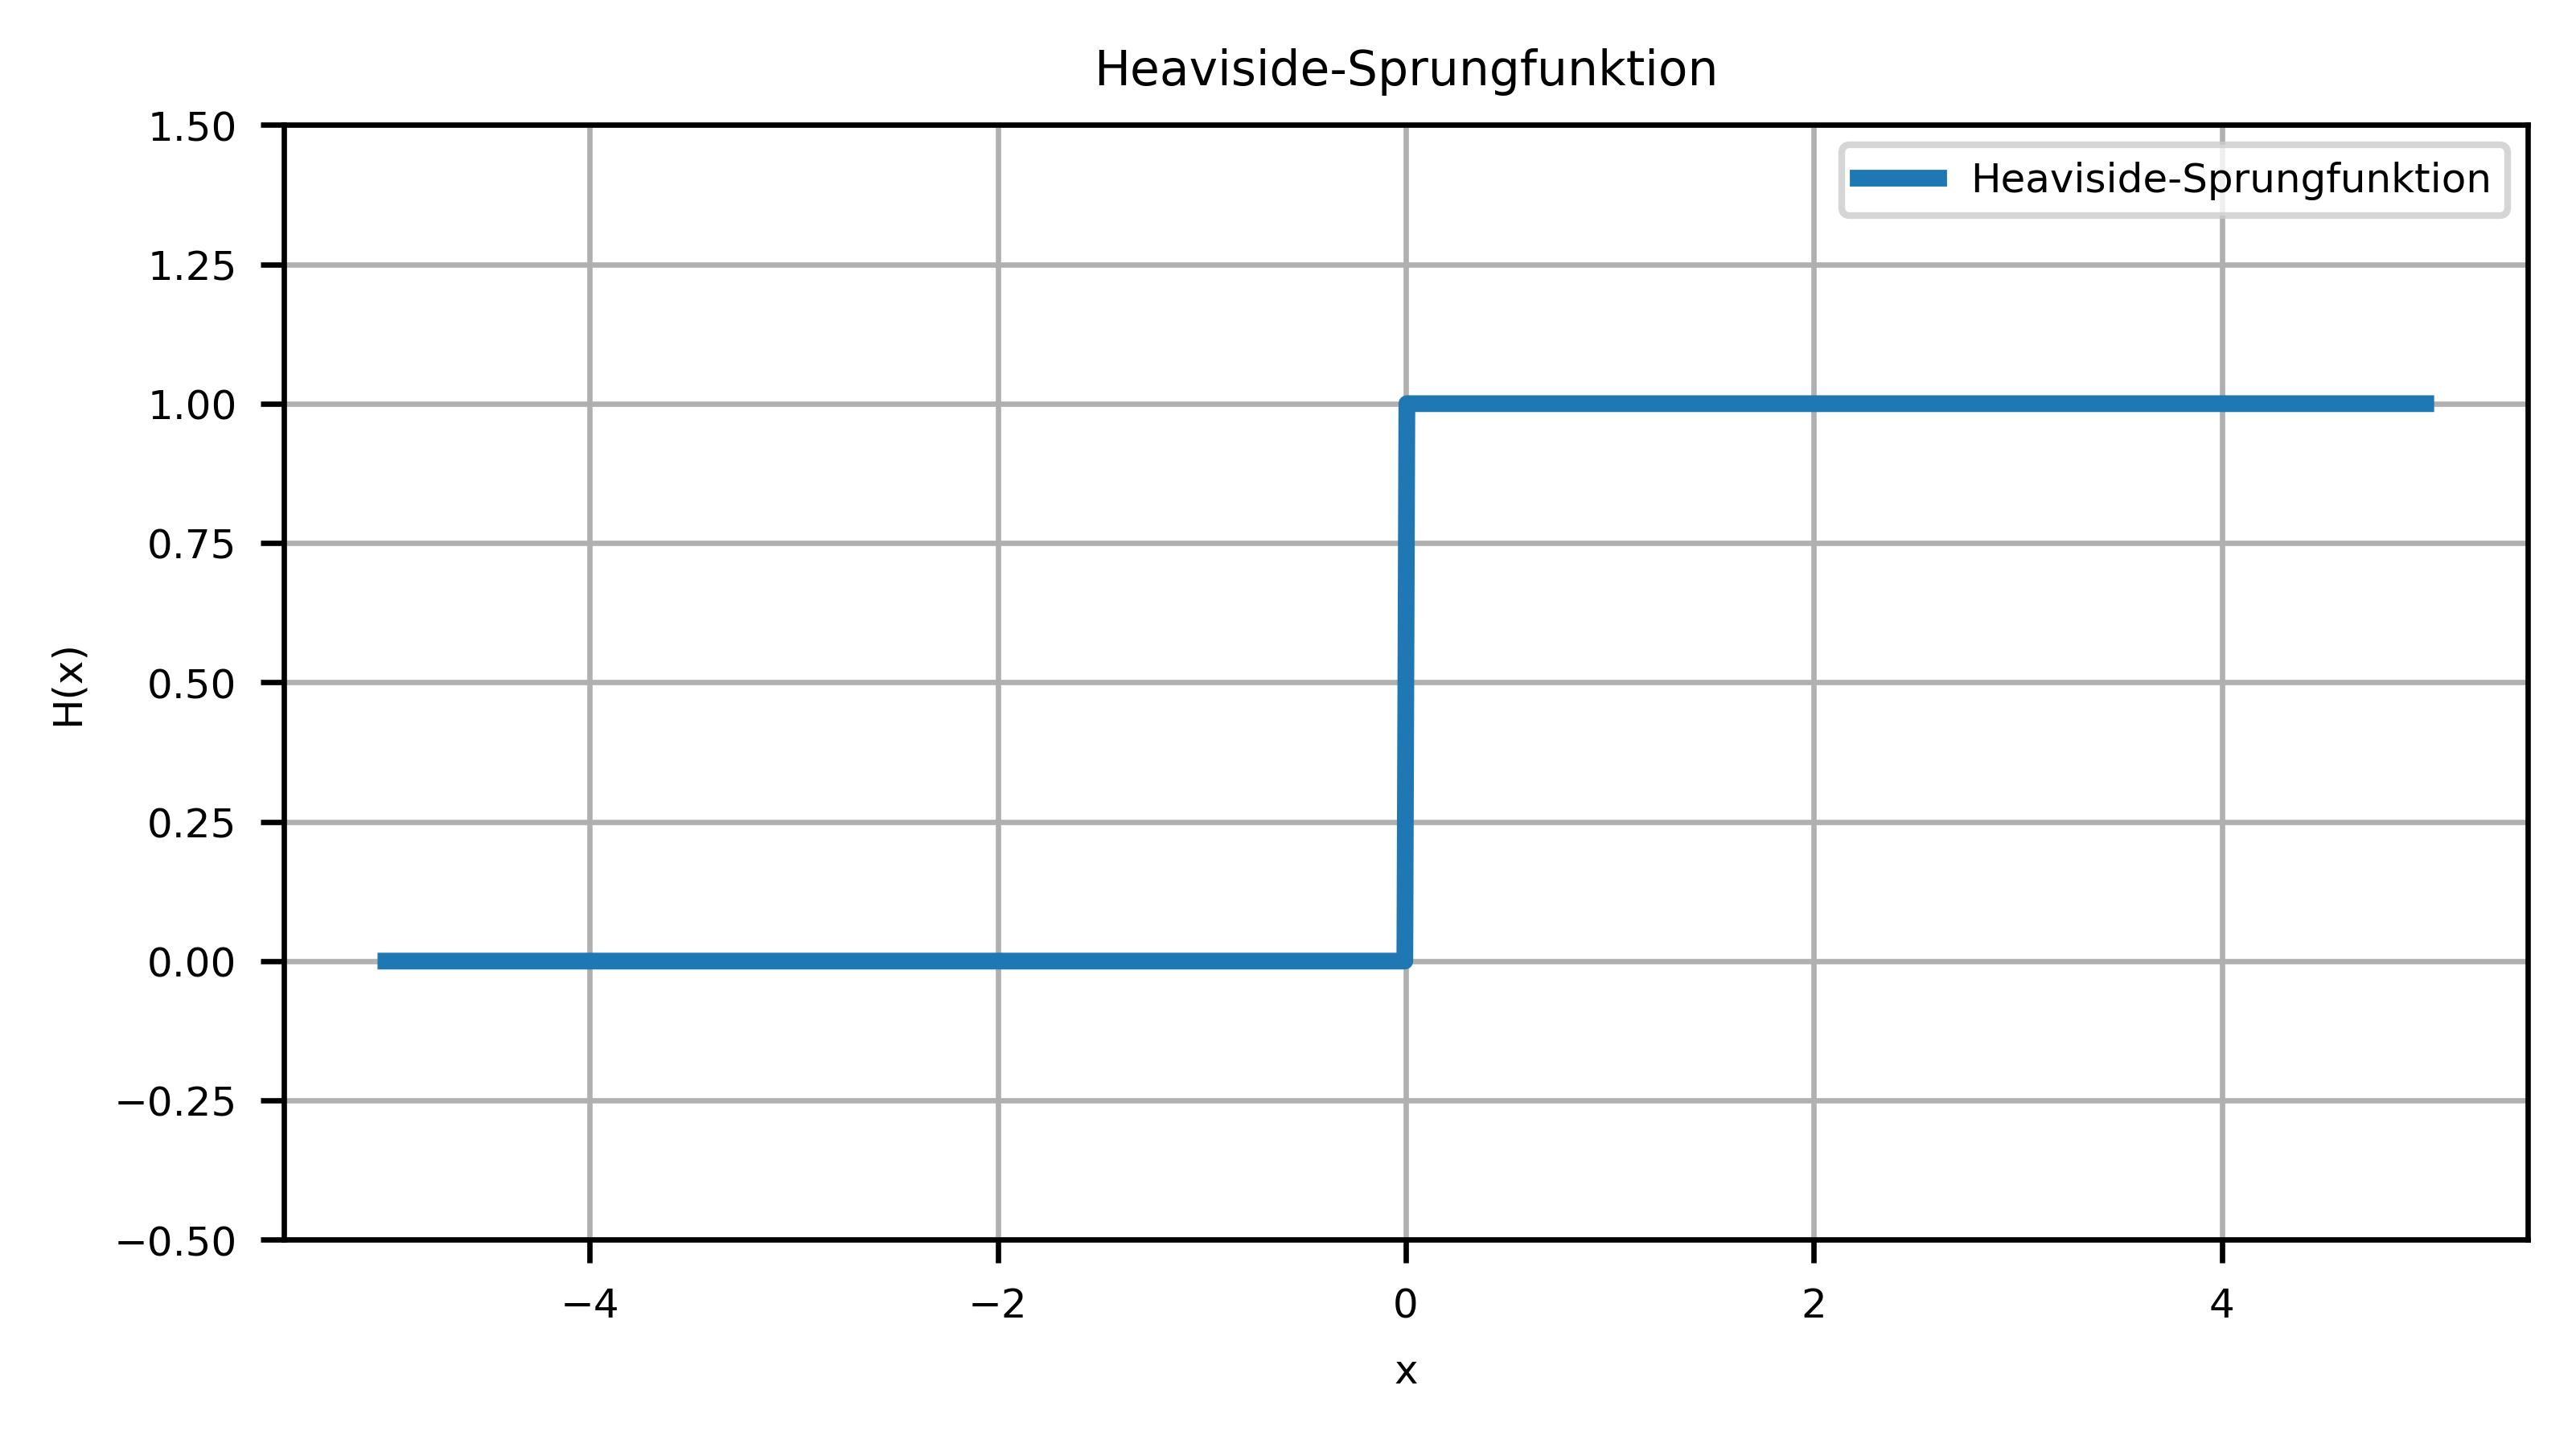

In [2]:
# Definiere die Heaviside-Sprungfunktion als Python-Funktion
def heaviside(x):
    return 0.5 * (np.sign(x) + 1)


# Erzeuge Werte für x
x = np.linspace(-5, 5, 1000)

# Berechne die Werte der Heaviside-Funktion für die gegebenen x-Werte
y = heaviside(x)

# Plot
plt.figure(dpi=600, figsize=(6, 3))
plt.rcParams.update({'font.size': 6})
plt.tight_layout()
plt.plot(x, y, linewidth = 2.5, label="Heaviside-Sprungfunktion")
plt.xlabel("x")
plt.ylabel("H(x)")
plt.title("Heaviside-Sprungfunktion")
plt.ylim([-0.5,1.5])
plt.grid(True)
plt.legend()
plt.show()

Wir können also mit der Heavisidesprungfunktion festlegen ab welchem Schwellenwert $x$ ein bestimmtes Signal $y_{\text{Signal}}$ weitergeleitet wird. Auf diese Weise fungiert die Heavysidesprungfunktion also als Signalfilter.

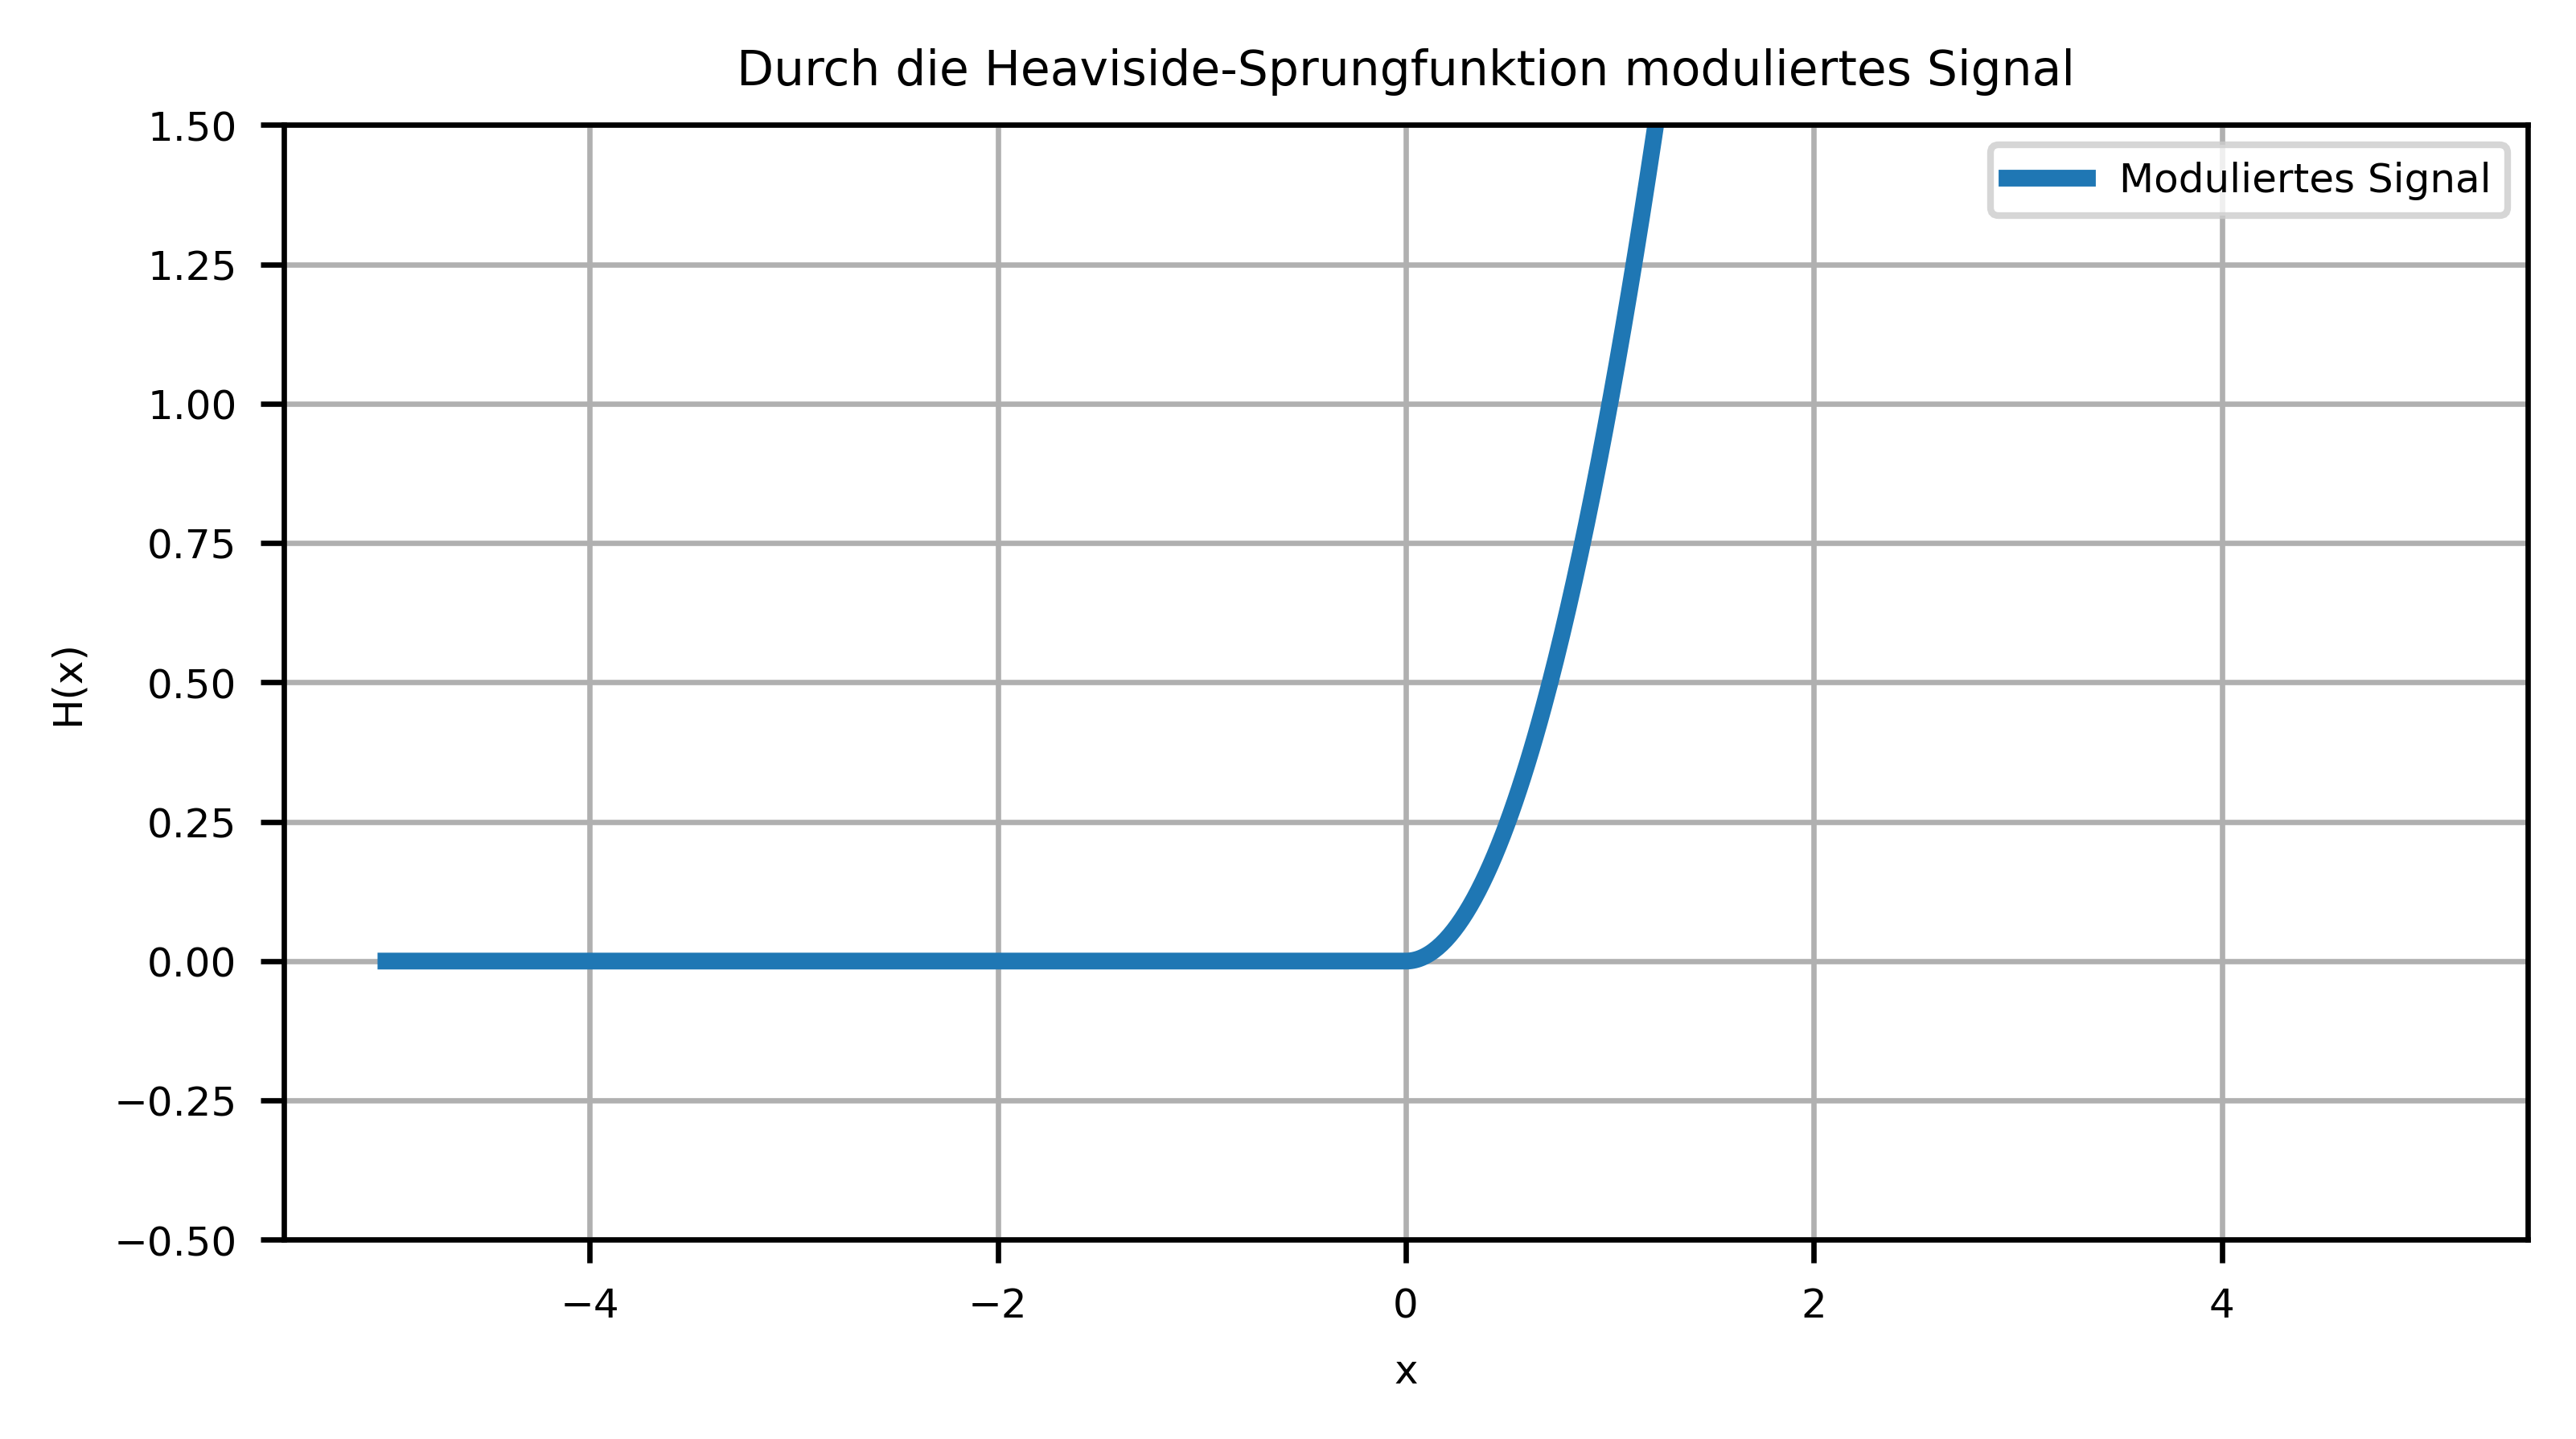

In [3]:
# Berechne die Werte der Heaviside-Funktion für die gegebenen x-Werte

y_signal = x**2

y = heaviside(x)*y_signal

# Plot
plt.figure(dpi=600, figsize=(6, 3))
plt.rcParams.update({'font.size': 6})
plt.tight_layout()
plt.plot(x, y, linewidth = 2.5, label="Moduliertes Signal")
plt.xlabel("x")
plt.ylabel("H(x)")
plt.title("Durch die Heaviside-Sprungfunktion moduliertes Signal")
plt.ylim([-0.5,1.5])
plt.grid(True)
plt.legend()
plt.show()

## Einfaches Perzeptron

Betrachten wir zuerst den einfachsten Aufbau eines neuronalen Netzwerks, des ursprünglich von Rosenblatt vorgeschlagenen **Pezeptrons**. Dieses ist aus zwei Eingängen, dem Neuron selbst und einem Ausgang aufgebaut, wie dies in der folgenden Abbildung dargestellt wird ({cite:t}`Matzka.2021`, s.114, {cite:t}`Sonnet.2022`, s.18).

<img src="./images/perceptron.png" alt="drawing" width="80%"/>

Wir gehen davon aus, dass die Eingaben $x_1,x_2$ von früheren Neuronen stammen, die ebenfalls durch die **Heaviside-Sprungfunktion** aktiviert werden und damit entweder aktiviert sind, was einem Wert von $1$ entspricht, oder inaktiv bleiben und einen Wert von $0$ annehmen. Wir legen willkürlich die Gewichte und den Bias auf $w_1 = 0,5$, $w_2= -0,4$ und $b = -0,3$ fest. Als nächsten Schritt wollen wir versuchen, den in der folgenden Tabelle zusammengefassten Output durch schrittweise Anpassung der Gewichte der Eingabewerte zu reproduzieren. Wir wollen somit unser Neuron mit überwachtem Lernen trainieren, eine Klassifikation der Daten durchzuführen.

| $x_1$        | $x_2$ | Output     |
|--------------|-------|-----------|
| $0$| $0$    | $0$    |
| $0$  | $1$  | $0$    |
| $1$| $0$    | $1$    |
| $1$| $1$    | $1$    |

In der nachfolgenden Abbildung sind die Daten für $x_1$ und $x_2$ nach ihrem Output klassifiziert dargestellt. Wir erkennen, dass die Daten linear separierbar, d. h. durch eine Gerade trennbar, sind. Diese Verknüpfungen zweier Eingabesignale eignen sich dazu, grundlegende **[logische Verknüpfungen](https://de.wikipedia.org/wiki/Logische_Verkn%C3%BCpfung#Zweistellige_logische_Verkn%C3%BCpfung)**, auch **[Logikgatter](https://de.wikipedia.org/wiki/Logikgatter)** genannt, nachzubilden.

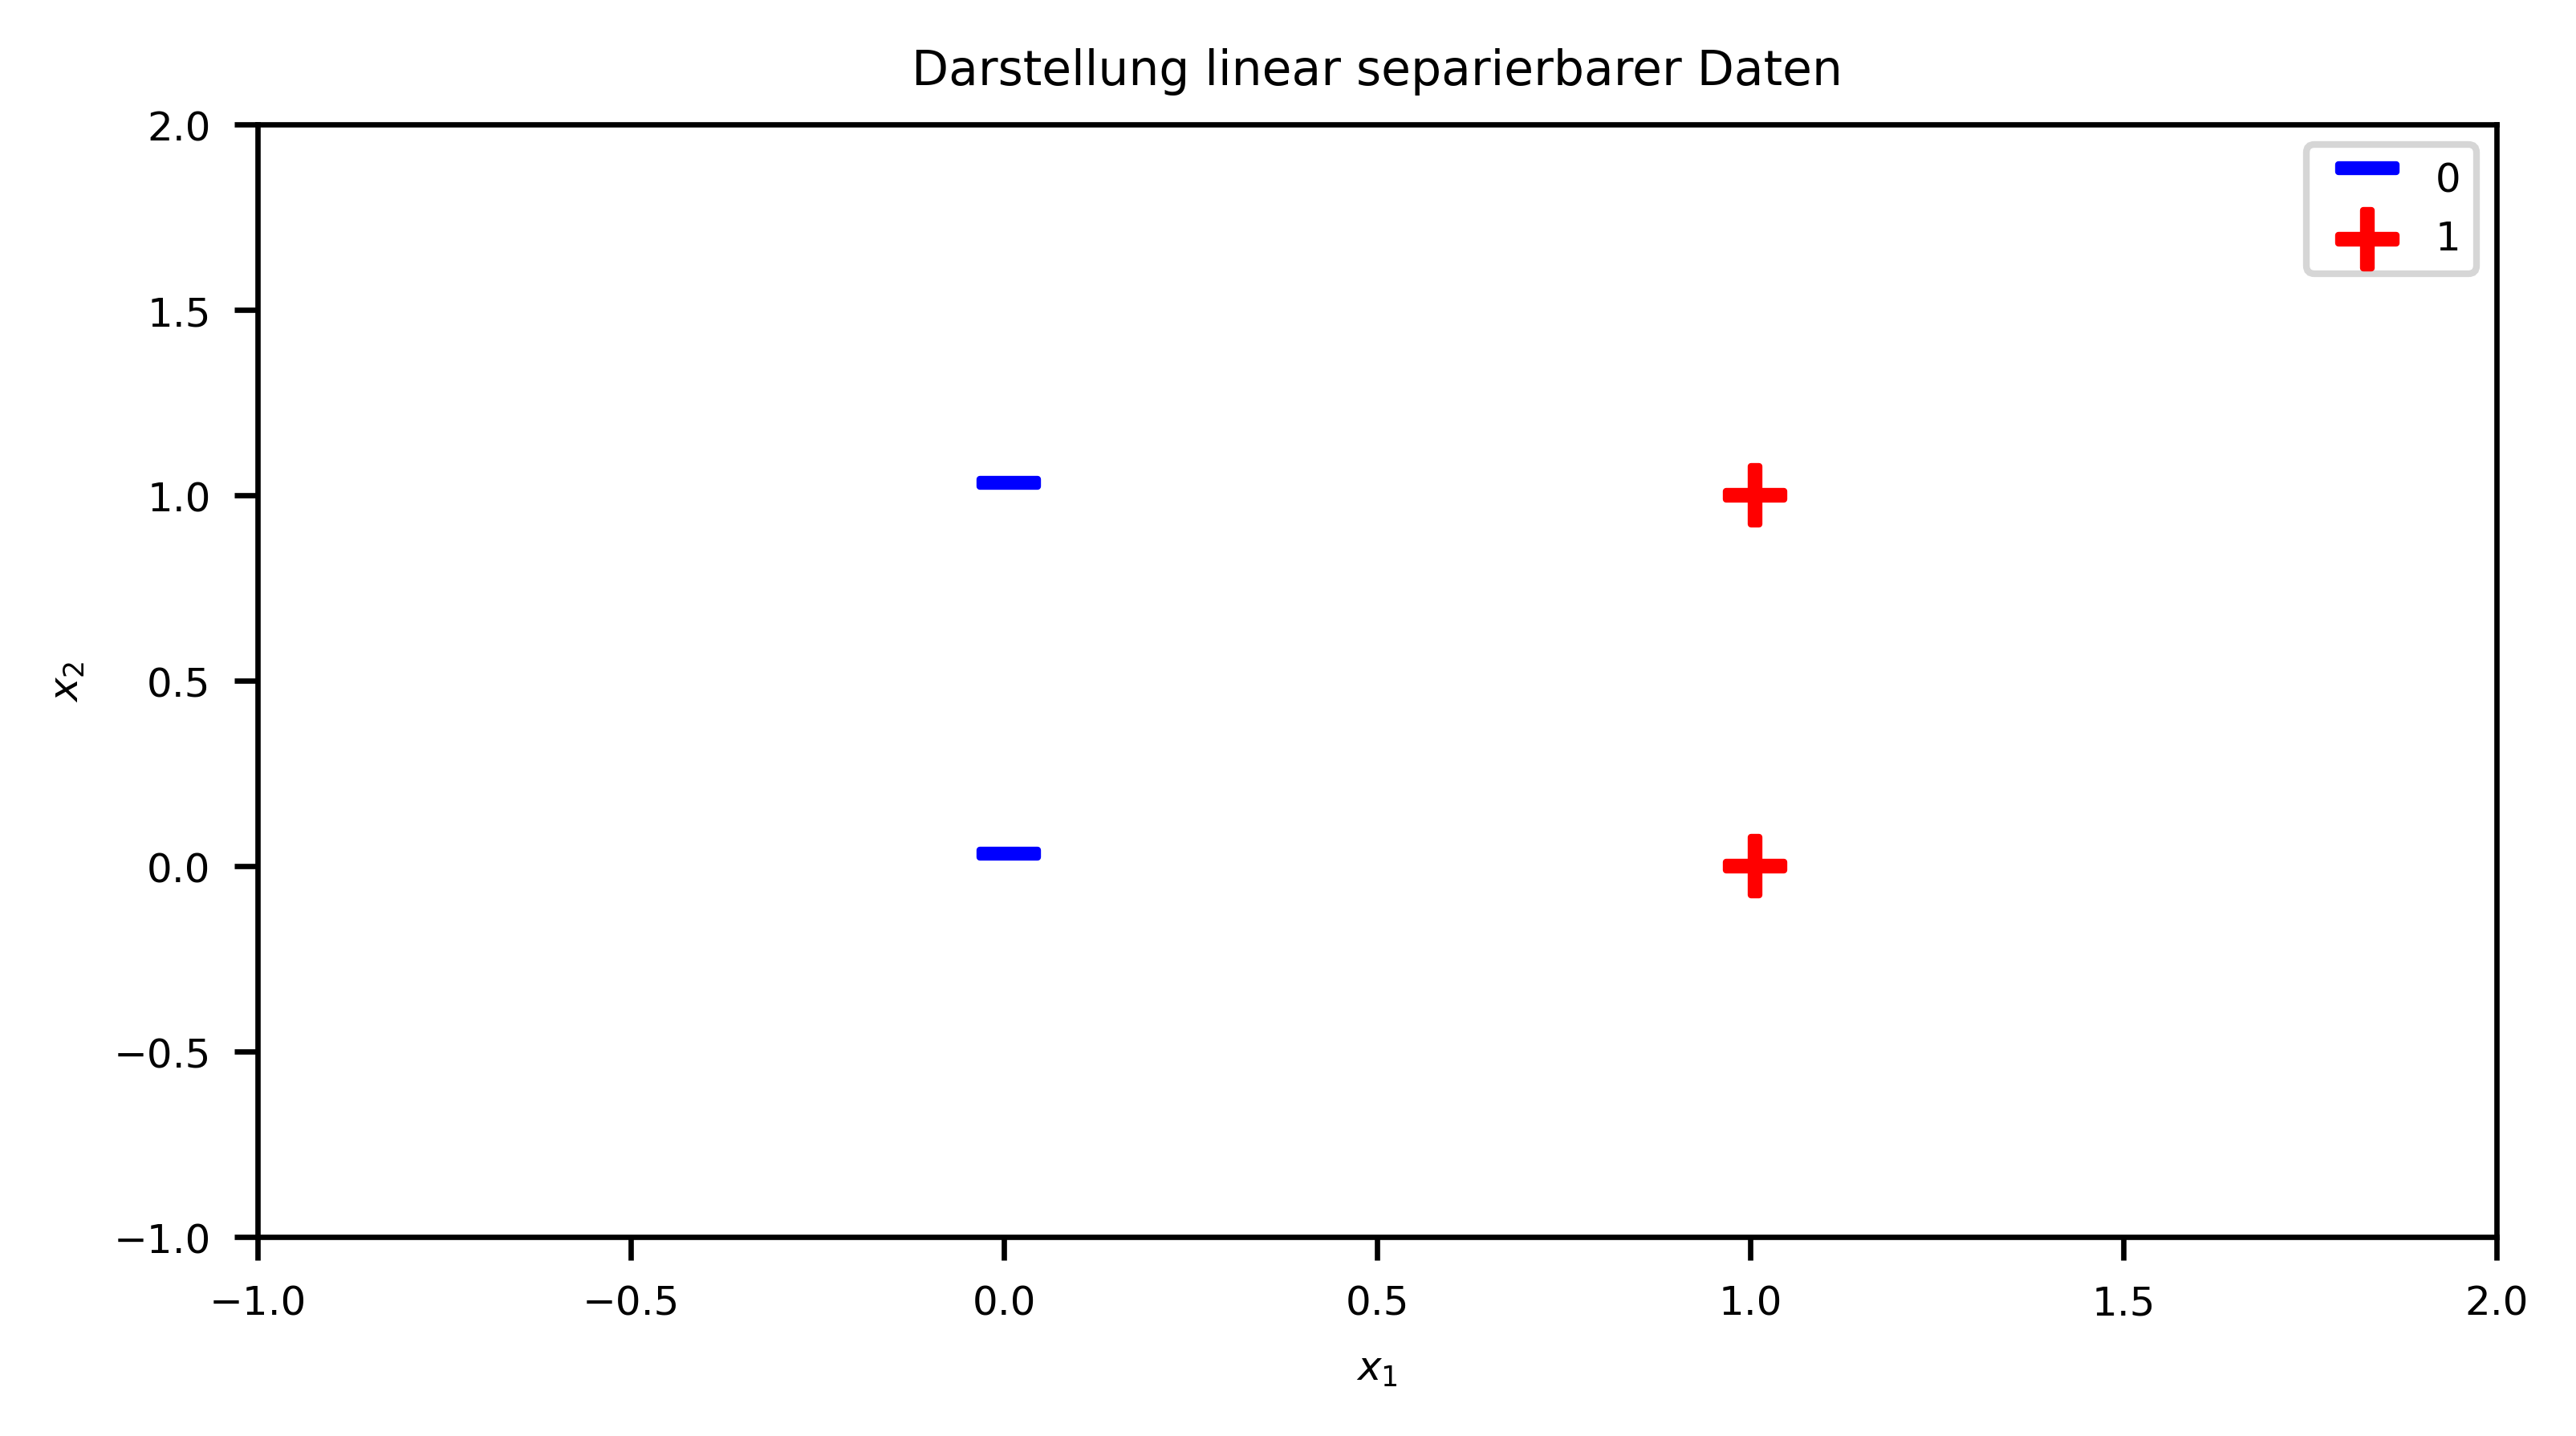

In [4]:
import matplotlib.pyplot as plt

# X-Eingabevariablen
X = [[0, 0], [0, 1], [1, 0], [1, 1]]

# Label-Daten
Y = [0, 0, 1, 1]

# Aufteilen der Eingabevariablen in zwei Klassen
class_0 = [X[i] for i in range(len(X)) if Y[i] == 0]
class_1 = [X[i] for i in range(len(X)) if Y[i] == 1]

plt.figure(dpi=600, figsize=(6, 3))
plt.rcParams.update({'font.size': 6})
plt.tight_layout()

# Datenpunkte darstellen
plt.scatter(*zip(*class_0), marker="$-$", label="0", c="blue", s=100)
plt.scatter(*zip(*class_1), marker="$+$", label="1", c="red", s=100)

plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Darstellung linear separierbarer Daten")
plt.legend(loc="best")
plt.show()

Wir berechnen jetzt, wie in der folgenden Tabelle zusammengefasst ist, die gewichtete Summe der Eingabewerte und vergleichen den berechneten und erwarteten Output.

| $x_1$        | $x_2$ | $x_1 w_1 + x_2 w_2 + b$     | Berechnung     |Output     |
|--------------|-------|-----------------------------|:-----------:|:-----------:|
| $0$| $0$    | $0 \cdot 0,5 + 0 \cdot (-0,4) - 0,3 = -0,3 < 0$   | $0$    | $0$    |
| $0$  | $1$  | $0 \cdot 0,5 + 1 \cdot (-0,4) - 0,3 = -0,7 < 0$   | $0$    | $0$    |
| $1$| $0$    | $1 \cdot 0,5 + 0 \cdot (-0,4) - 0,3 = +0,2 \ge 0$ | $1$    | $1$    |
| $1$| $1$    | $1 \cdot 0,5 + 1 \cdot (-0,4) - 0,3 = -0,2 < 0$   | $0$    | $1$    |

Wie wir sehen können, wurden in der ersten Iteration, die auch als **Epoche** bezeichnet wird, drei von vier Outputs richtig wiedergegeben. Die Frage ist nun: Wie kann unser Modell lernen? Eine erste Methode stellt die Anpassung der Gewichte $w_i$ nach der **[Perzeptron-Lernregel](https://de.wikipedia.org/wiki/Perzeptron#Perzeptron-Lernregel)** (*engl. Perceptron Convergence Procedure*) dar.

Die **Perzeptron-Lernregel** kann auf die folgende Weise zusammengefasst werden ({cite:t}`Sonnet.2022`, s.21 ):

1. Kleine und zufällig gewählte Startwerte für $w_1$, $w_2$ und $b$ werden bestimmt.
2. Für den ersten Datensatz (erste Zeile) wird der Fehler berechnet.
3. Wenn Fehler $= 0$, passe $w_1$ und $w_2$ nicht an.
4. Wenn Fehler $= 1$, erhöhe $w_1$ und $w_2$ .
5. Wenn Fehler $= −1$, verringere $w_1$ und $w_2$ .
6. Berechne den Fehler für den nächsten Datensatz und gehe zu Schritt 3.

Mathematisch können wir den Sachverhalt folgendermaßen beschreiben:

$$ w_i^{\text{neu}} = w_i^{\text{alt}} + \Delta w_i =  w_i^{\text{alt}} + \alpha (o_e - o_b) x_i$$

Dabei ist $\alpha$ die willkürlich festgelegte Lernrate, $o_e$ der erwartete Output, $o_b$ der berechnete Output und $x_i$ der $i$te Eingabewert.

Die Lernrate $\alpha$ ist im Prinzip frei wählbar, sollte aber aus Konvergenzgründen weder zu groß noch zu klein sein. Wir legen in unserem Fall die **Lernrate** als $\alpha = 0,15$ fest. Umgelegt auf das Rechenbeispiel ergeben sich für die ersten drei Berechnungen keine Fehler. Bei der vierten Berechnung passen wir die Gewichte nach der Lernregel an und erhalten:

$w_i^{\text{neu}} = w_i^{\text{alt}} + \Delta w_i =  w_i^{\text{alt}} + \alpha (o_e - o_b) x_i = w_i^{\text{alt}} + 0,15 \cdot (1 - 0) \cdot 1$

$w_1^{\text{neu}} = 0,5 + 0,15 = 0,65 \  $ , $w_2^{\text{neu}} = -0,4 + 0,15 = -0,25$

Mit den angepassten Gewichten führen wir die Berechnung ein zweites Mal durch und erhalten:

| $x_1$        | $x_2$ | $x_1 w_1 + x_2 w_2 + b$     | Berechnung     |Output     |
|--------------|-------|-----------------------------|:-----------:|:-----------:|
| $0$| $0$    | $0 \cdot 0,65 + 0 \cdot (-0,25) - 0,3 = -0,3 \ \  < 0$   | $0$    | $0$    |
| $0$| $1$    | $0 \cdot 0,65 + 1 \cdot (-0,25) - 0,3 = -0,55 < 0$   | $0$    | $0$    |
| $1$| $0$    | $1 \cdot 0,65 + 0 \cdot (-0,25) - 0,3 = +0,35 \ge 0$ | $1$    | $1$    |
| $1$| $1$    | $1 \cdot 0,65 + 1 \cdot (-0,25) - 0,3 = +0,1 \ \ \ge 0$   | $1$    | $1$    |

Wie wir sehen können, konvergiert die Berechnung bereits in der zweiten Epoche. Versuchen wir jetzt, dieselbe Berechnung in `Python` durchzuführen. 

Dazu legen wir zuerst die Gewichte `weights`, die Eingabewerte `X_train`, den erwünschten Output `y_train` und den Bias `b` fest und berechnen die Anpassung der Gewichte über eine `for`-Schleife:

In [5]:
import numpy as np

# Beispiel-Datensatz
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 0, 1, 1])

weights = np.array([0.5, -0.4])
b = -0.3

learning_rate = 0.15

for a in range(2):
    print(f"Epoche: {a+1}")
    output = []
    for i in range(len(X_train)):
        output2 = np.dot(X_train[i], weights) + b

        if (output2) > 0:
            output.append(1)
        else:
            output.append(0)
    for i in range(len(y_train)):
        error = y_train[i] - output[i]
        print(error, "error")

        if (error) == 1:
            weights += learning_rate
            print("Increase Weights")
            print(weights)
        elif (error) == -1:
            weights -= learning_rate
            print("Decrease Weights")

        else:
            print("No Change")
        print("-_-" * 20)

Epoche: 1
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
1 error
Increase Weights
[ 0.65 -0.25]
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
Epoche: 2
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-


Wir erinnern uns an das eingangs erwähnte `XOR`-Problem. Dieses kann durch folgenden Output dargestellt werden:

| $x_1$        | $x_2$ | Output     |
|--------------|-------|-----------|
| $0$| $0$    | $0$    |
| $0$  | $1$  | $1$    |
| $1$| $0$    | $1$    |
| $1$| $1$    | $0$    |

Graphisch lassen sich die Daten folgendermaßen darstellen:

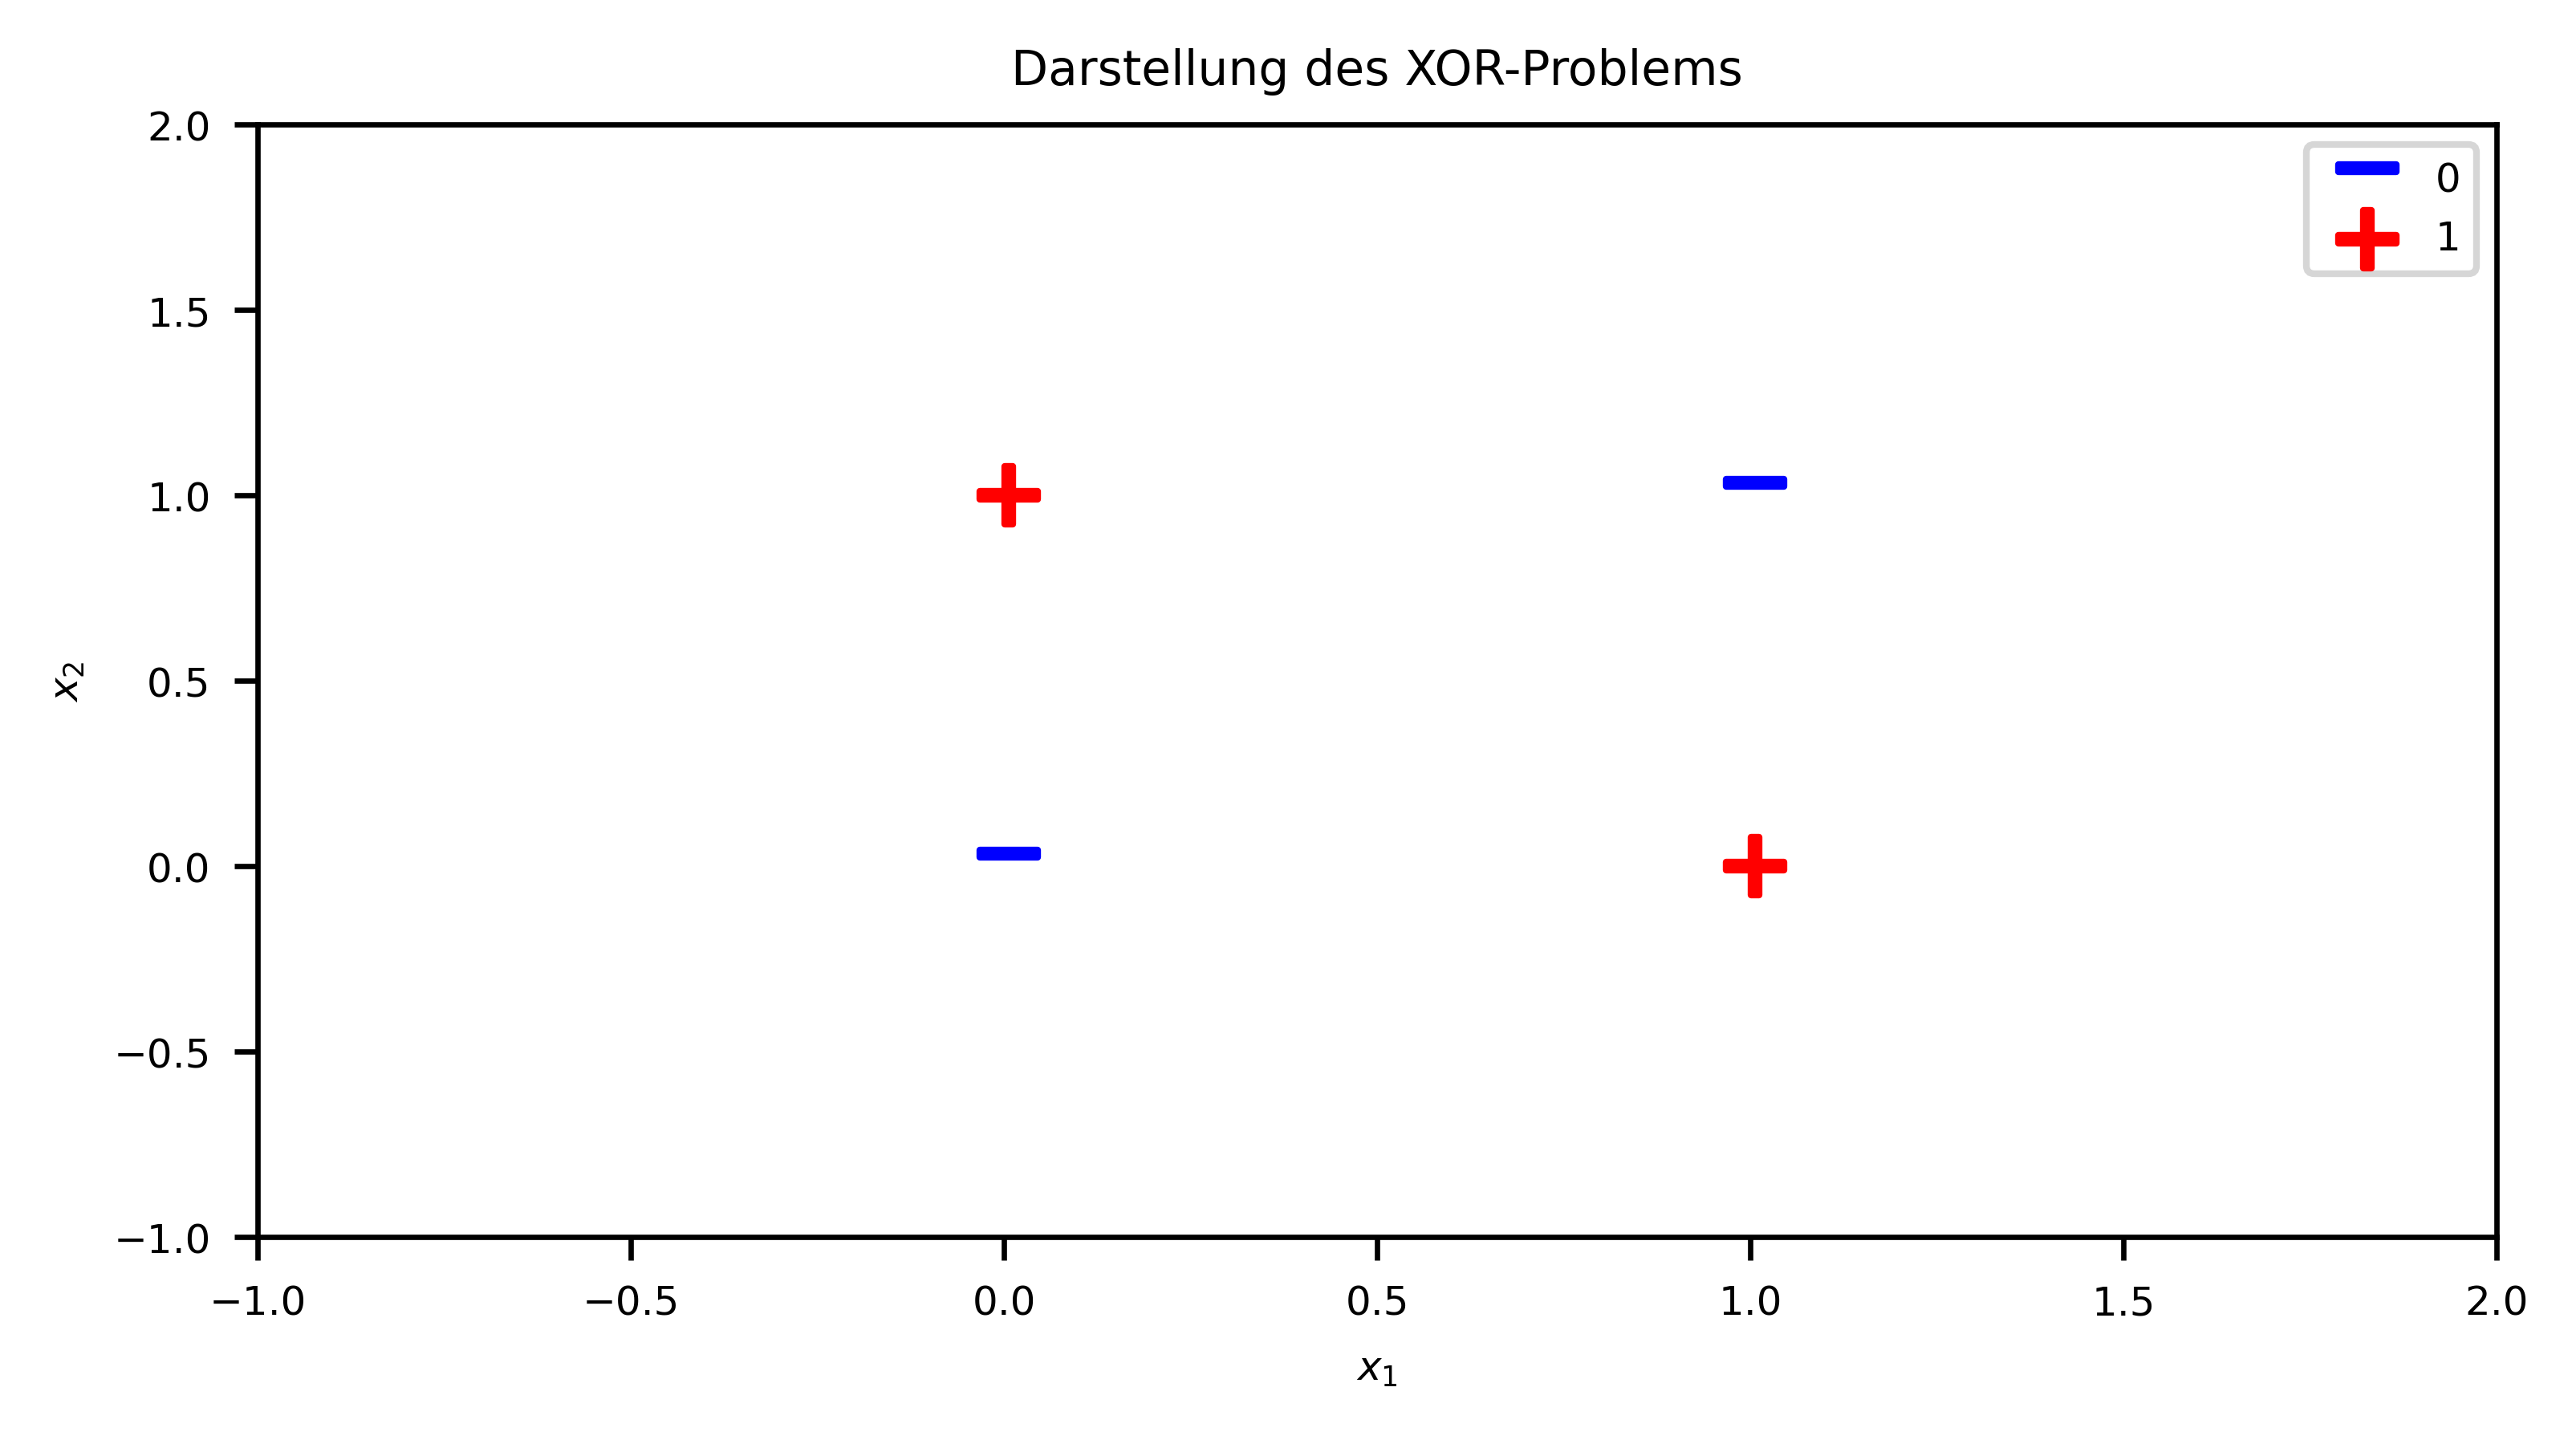

In [6]:
plt.figure(dpi=600, figsize=(6, 3))
plt.rcParams.update({'font.size': 6})
plt.tight_layout()

# XOR-Eingabevariablen
X = [[0, 0], [0, 1], [1, 0], [1, 1]]

# XOR-Ausgaben
Y = [0, 1, 1, 0]

# Aufteilen der Eingabevariablen in zwei Klassen
class_0 = [X[i] for i in range(len(X)) if Y[i] == 0]
class_1 = [X[i] for i in range(len(X)) if Y[i] == 1]

# Datenpunkte darstellen
plt.scatter(*zip(*class_0), marker="$-$", label="0", c="blue", s=100)
plt.scatter(*zip(*class_1), marker="$+$", label="1", c="red", s=100)

plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Darstellung des XOR-Problems")
plt.legend(loc="best")
plt.show()

Wir führen dieselbe Berechnung wie oben durch und versuchen, das Ergebnis zu interpretieren:

In [7]:
import numpy as np

# Beispiel-Datensatz
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])

weights = np.array([0.5, -0.4])
b = -0.3

learning_rate = 0.15

for a in range(3):
    print(f"Epoche: {a+1}")
    output = []
    for i in range(len(X_train)):
        output2 = np.dot(X_train[i], weights) + b

        if (output2) > 0:
            output.append(1)
        else:
            output.append(0)
    for i in range(len(y_train)):
        error = y_train[i] - output[i]
        print(error, "error")

        if (error) == 1:
            weights += learning_rate
            print("Increase Weights")
            print(weights)
        elif (error) == -1:
            weights -= learning_rate
            print("Decrease Weights")

        else:
            print("No Change")
        print("-_-" * 20)

Epoche: 1
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
1 error
Increase Weights
[ 0.65 -0.25]
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
Epoche: 2
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
1 error
Increase Weights
[ 0.8 -0.1]
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
-1 error
Decrease Weights
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
Epoche: 3
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
1 error
Increase Weights
[ 0.8 -0.1]
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
0 error
No Change
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
-1 error
Decrease Weights
-_--_--_

Wir kommen zu dem Schluss, dass die Berechnung nicht konvergiert. Unsere Lernregel führt in diesem Fall zu einer oszillierenden Lösung, bei der wechselseitig Gewichte in jedem Durchlauf erhöht und gesenkt werden. Offensichtlich versagt unser Ansatz bei **nicht linear separierbaren Daten**. Wir werden später sehen, dass neuronale Netzwerke mit mehreren Schichten in der Lage sind, diese Problemstellung zu lösen.

### Numerische Ableitung

In [8]:
def f(x):
    return x**5 + x**3 + x

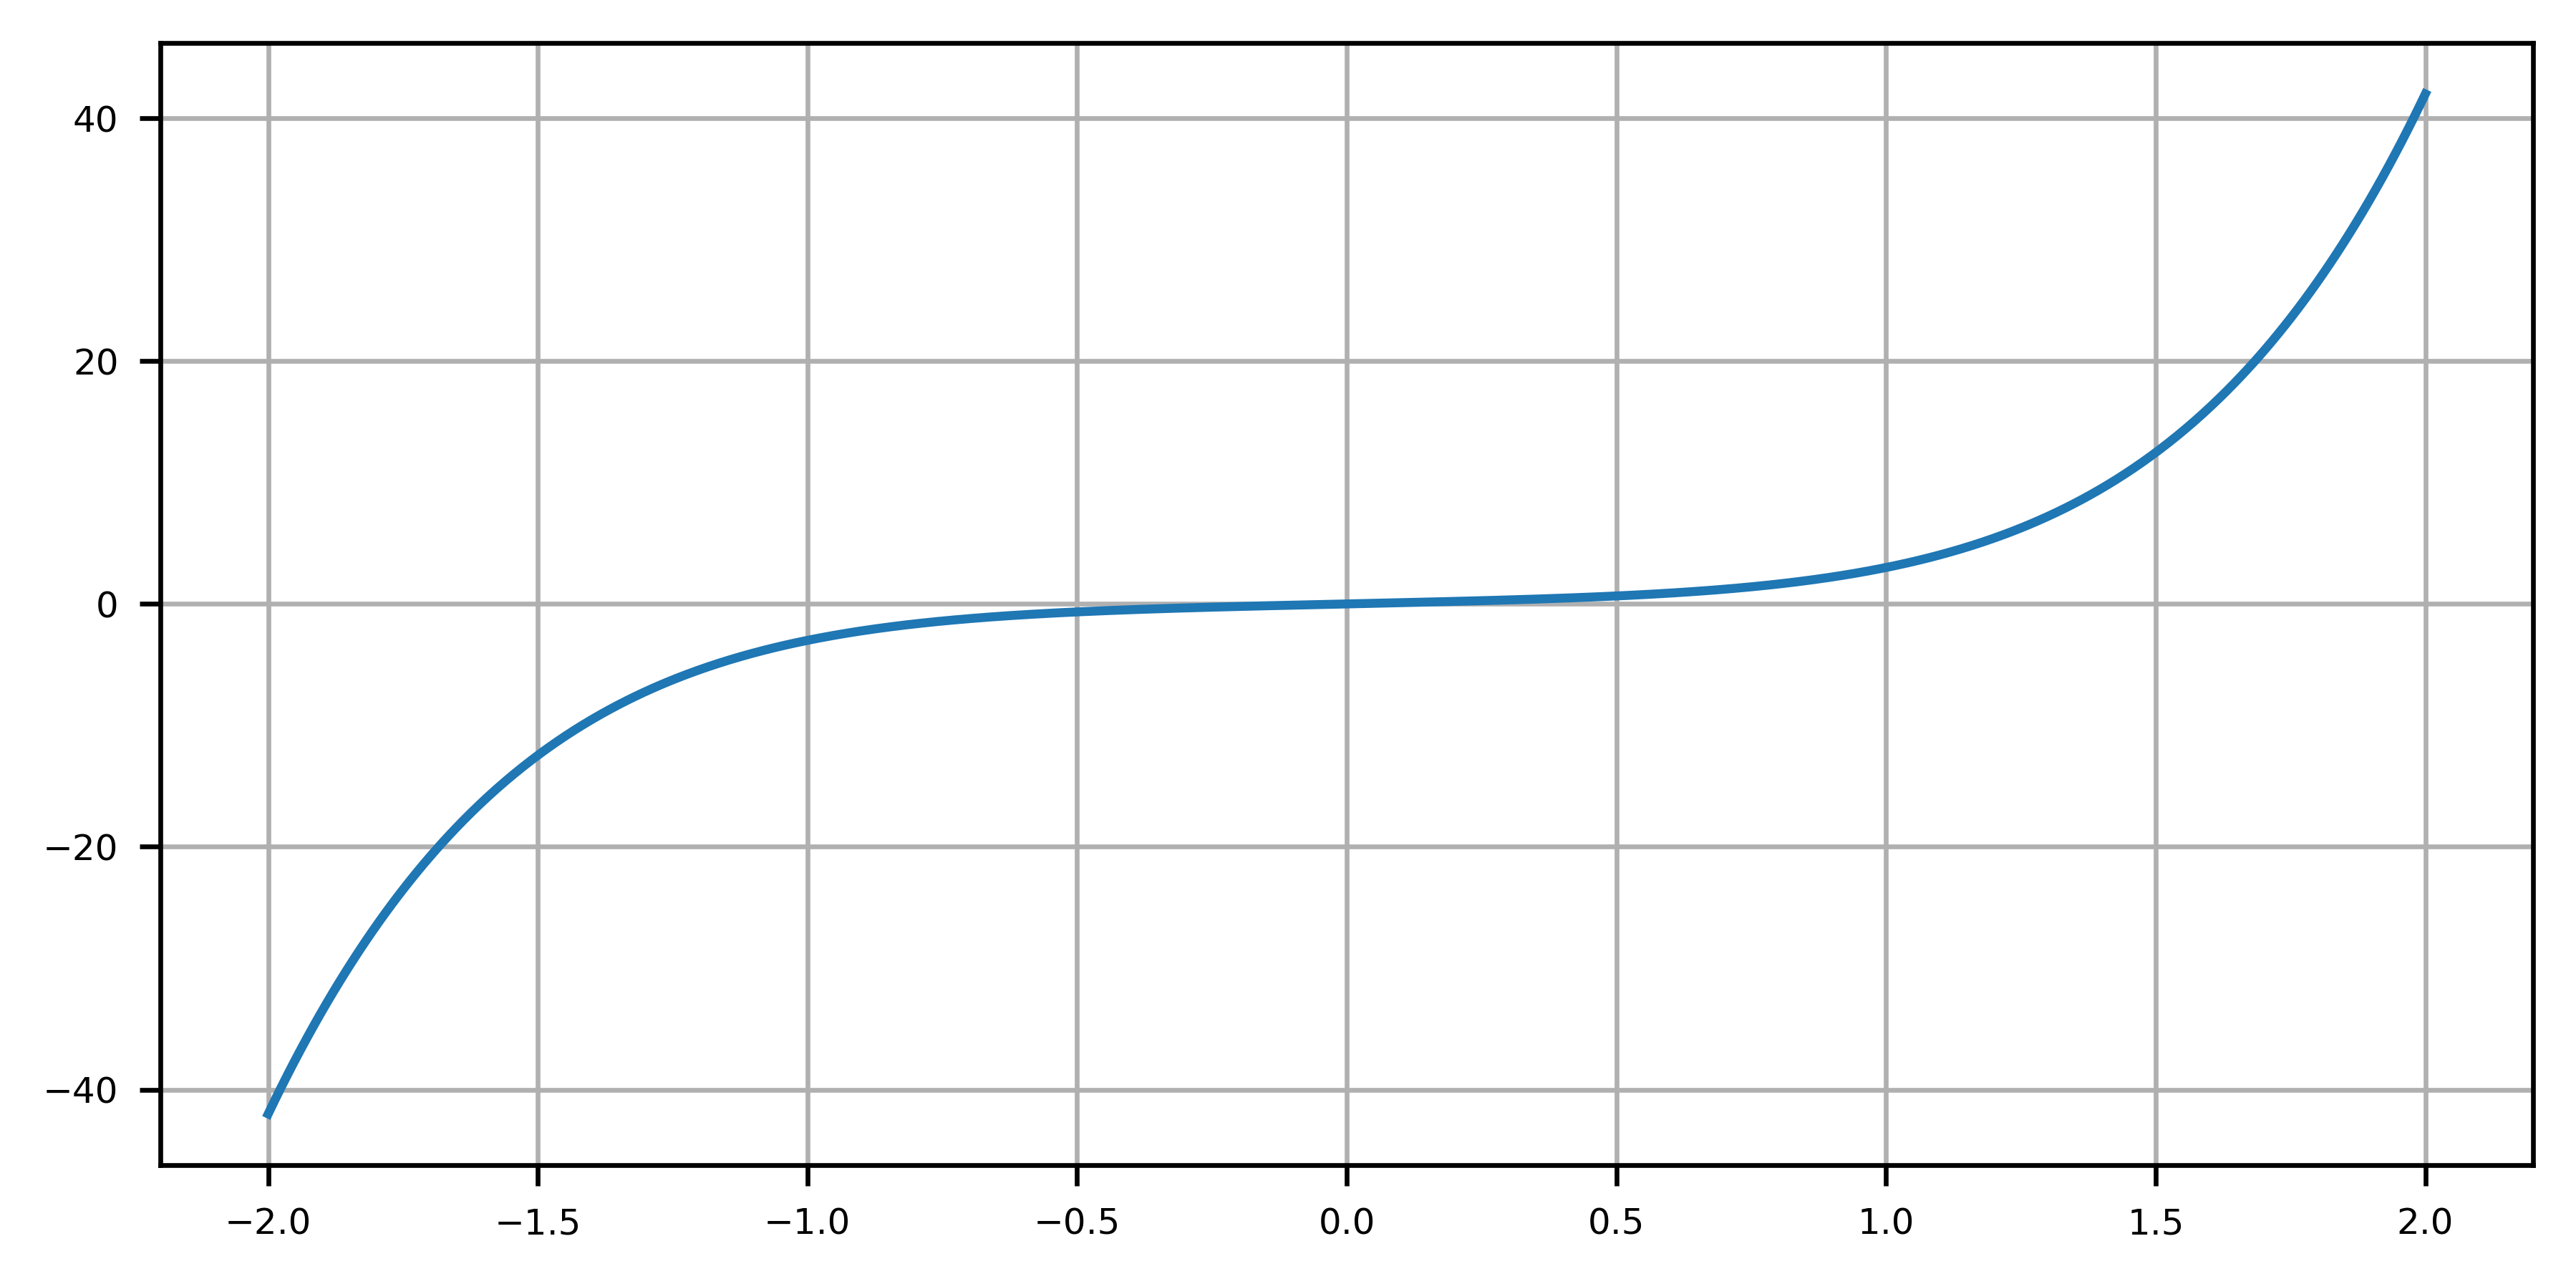

In [9]:
plt.figure(dpi=600, figsize=(6, 3))
plt.rcParams.update({'font.size': 6})
plt.grid()
plt.tight_layout()
x = np.linspace(-2,2, 1000)
y = f(x)


_ = plt.plot(x,y)

$$f^{\prime}(x) = \frac{d f (x)}{d x}  \approx \frac{ f (x + \epsilon) - f (x)}{(x + \epsilon) - x } = \frac{ f (x + \epsilon) - f (x)}{\epsilon} $$

In [10]:
def derivative(f, x, delta):
    return (f(x + delta) - f(x))/delta

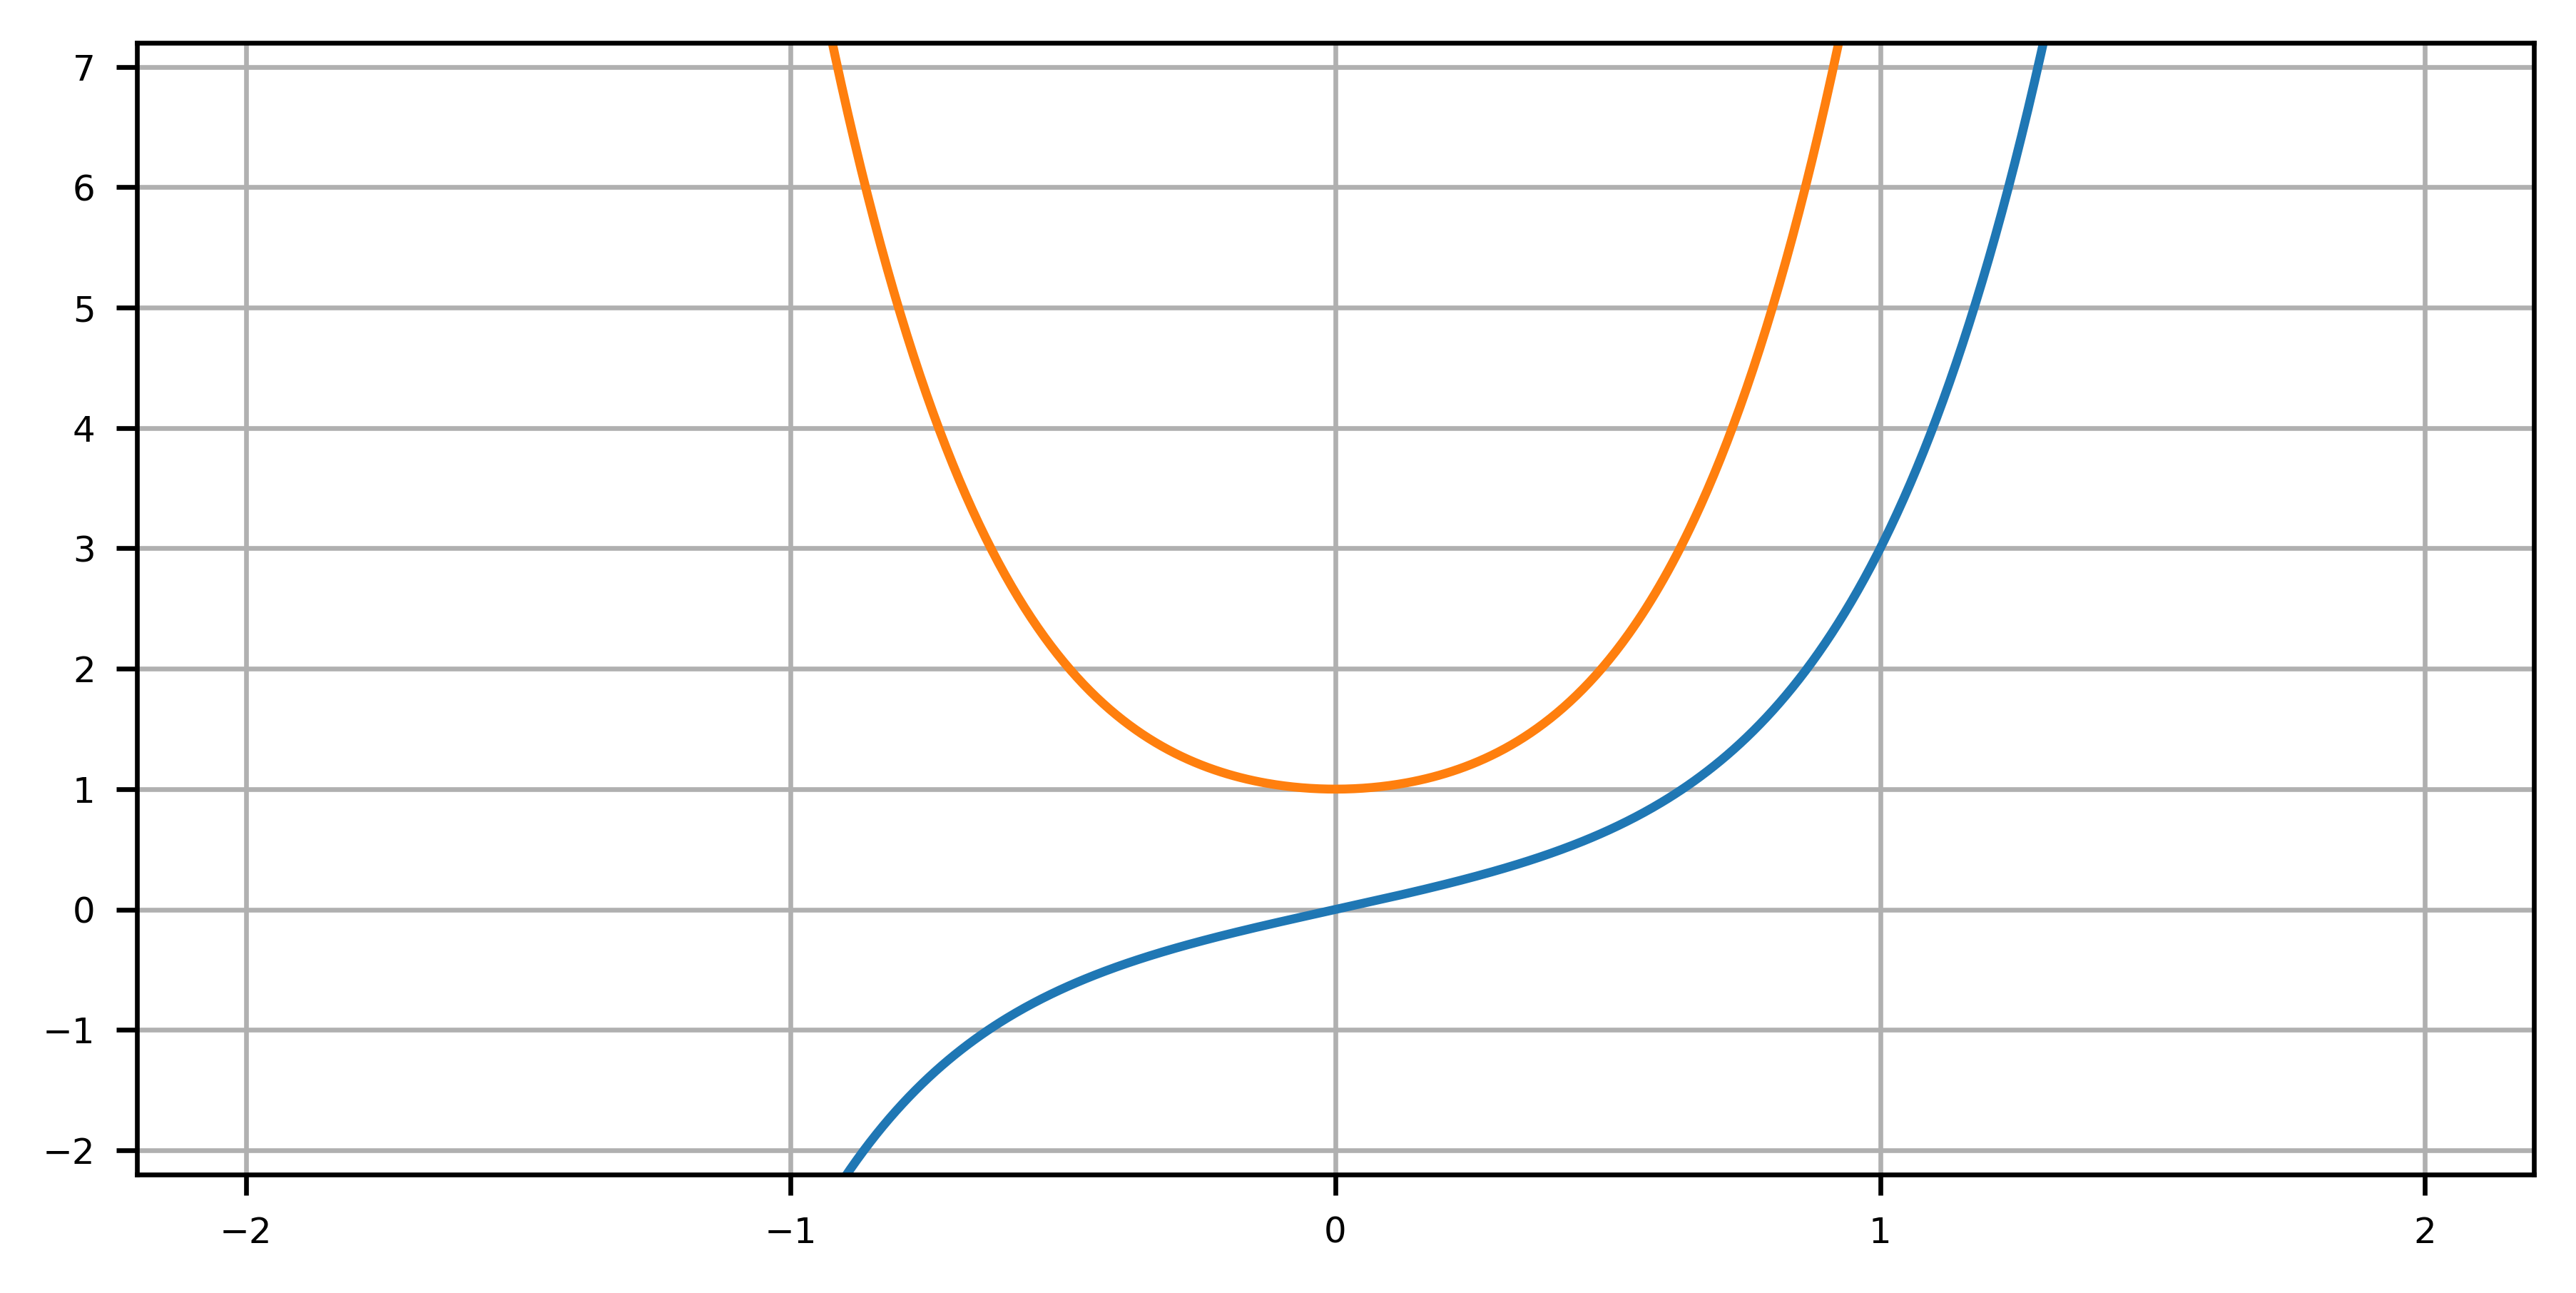

In [11]:
plt.figure(dpi=600, figsize=(6, 3))
plt.grid()
plt.xlim([-2.2,2.2])
plt.ylim([-2.2,7.2])
plt.yticks(np.arange(-2, 8, 1))
plt.xticks(np.arange(-2, 3, 1))
plt.rcParams.update({'font.size': 6})
plt.tight_layout()
plt.plot(x,y)
_ = plt.plot(x, derivative(f, x, 10**-5))

### Ableitung der ReLU-Aktivierungsfunktion

In [12]:
def relu_func(x):
    return np.maximum(0, x)

In [13]:
derivative(relu_func, x, delta = 1e-5)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Beispiel: Problem der numerischen Ableitung

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# ReLU-Funktion und numerische Ableitung
def relu_func(x):
    return np.maximum(0, x)

def derivative(func, x, delta=1e-5):
    return (func(x + delta) - func(x)) / (delta)

# Funktion, die den Plot aktualisiert
def plot_reAct(num_points):
    x = np.linspace(-2, 2, num_points)  # Anzahl der Punkte anpassen

    plt.figure(dpi=600, figsize=(6, 3))
    plt.rcParams.update({'font.size': 6})
    plt.tight_layout()

    # ReLU-Funktion
    plt.subplot(2, 1, 1)
    plt.plot(x, relu_func(x), label='ReLU(x)', color='blue')
    plt.title('ReLU-Funktion')
    plt.xlabel('x')
    plt.ylabel('ReLU(x)')
    plt.xlim(-2, 2)  # Setzt den Bereich der x-Achse auf [-2, 2]
    plt.grid(True)
    plt.legend()

    # Numerische Ableitung der ReLU-Funktion
    plt.subplot(2, 1, 2)
    plt.plot(x, derivative(relu_func, x, delta=1e-5), label="ReLU'(x)", color='red')
    plt.title('Numerische Ableitung der ReLU-Funktion')
    plt.xlabel('x')
    plt.ylabel("ReLU'(x)")
    plt.xlim(-2, 2)  # Setzt den Bereich der x-Achse auf [-2, 2]
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Interaktiver Schieberegler für die Anzahl der Punkte
interactive_plot = interactive(plot_reAct, num_points=(70, 1000, 1))  # Schieberegler von 70 bis 1000 Punkten

# Schieberegler-Layout: Position unter dem Plot (mittig)
interactive_plot.layout.align_items = 'center'  # Zentriert den Schieberegler
interactive_plot.layout.margin = '0px 0px 10px 0px'  # Fügt einen Abstand unter dem Plot hinzu

interactive_plot

interactive(children=(IntSlider(value=535, description='num_points', max=1000, min=70), Output()), layout=Layo…

remove?

In [ ]:
x = np.linspace(-2,2, 1000)

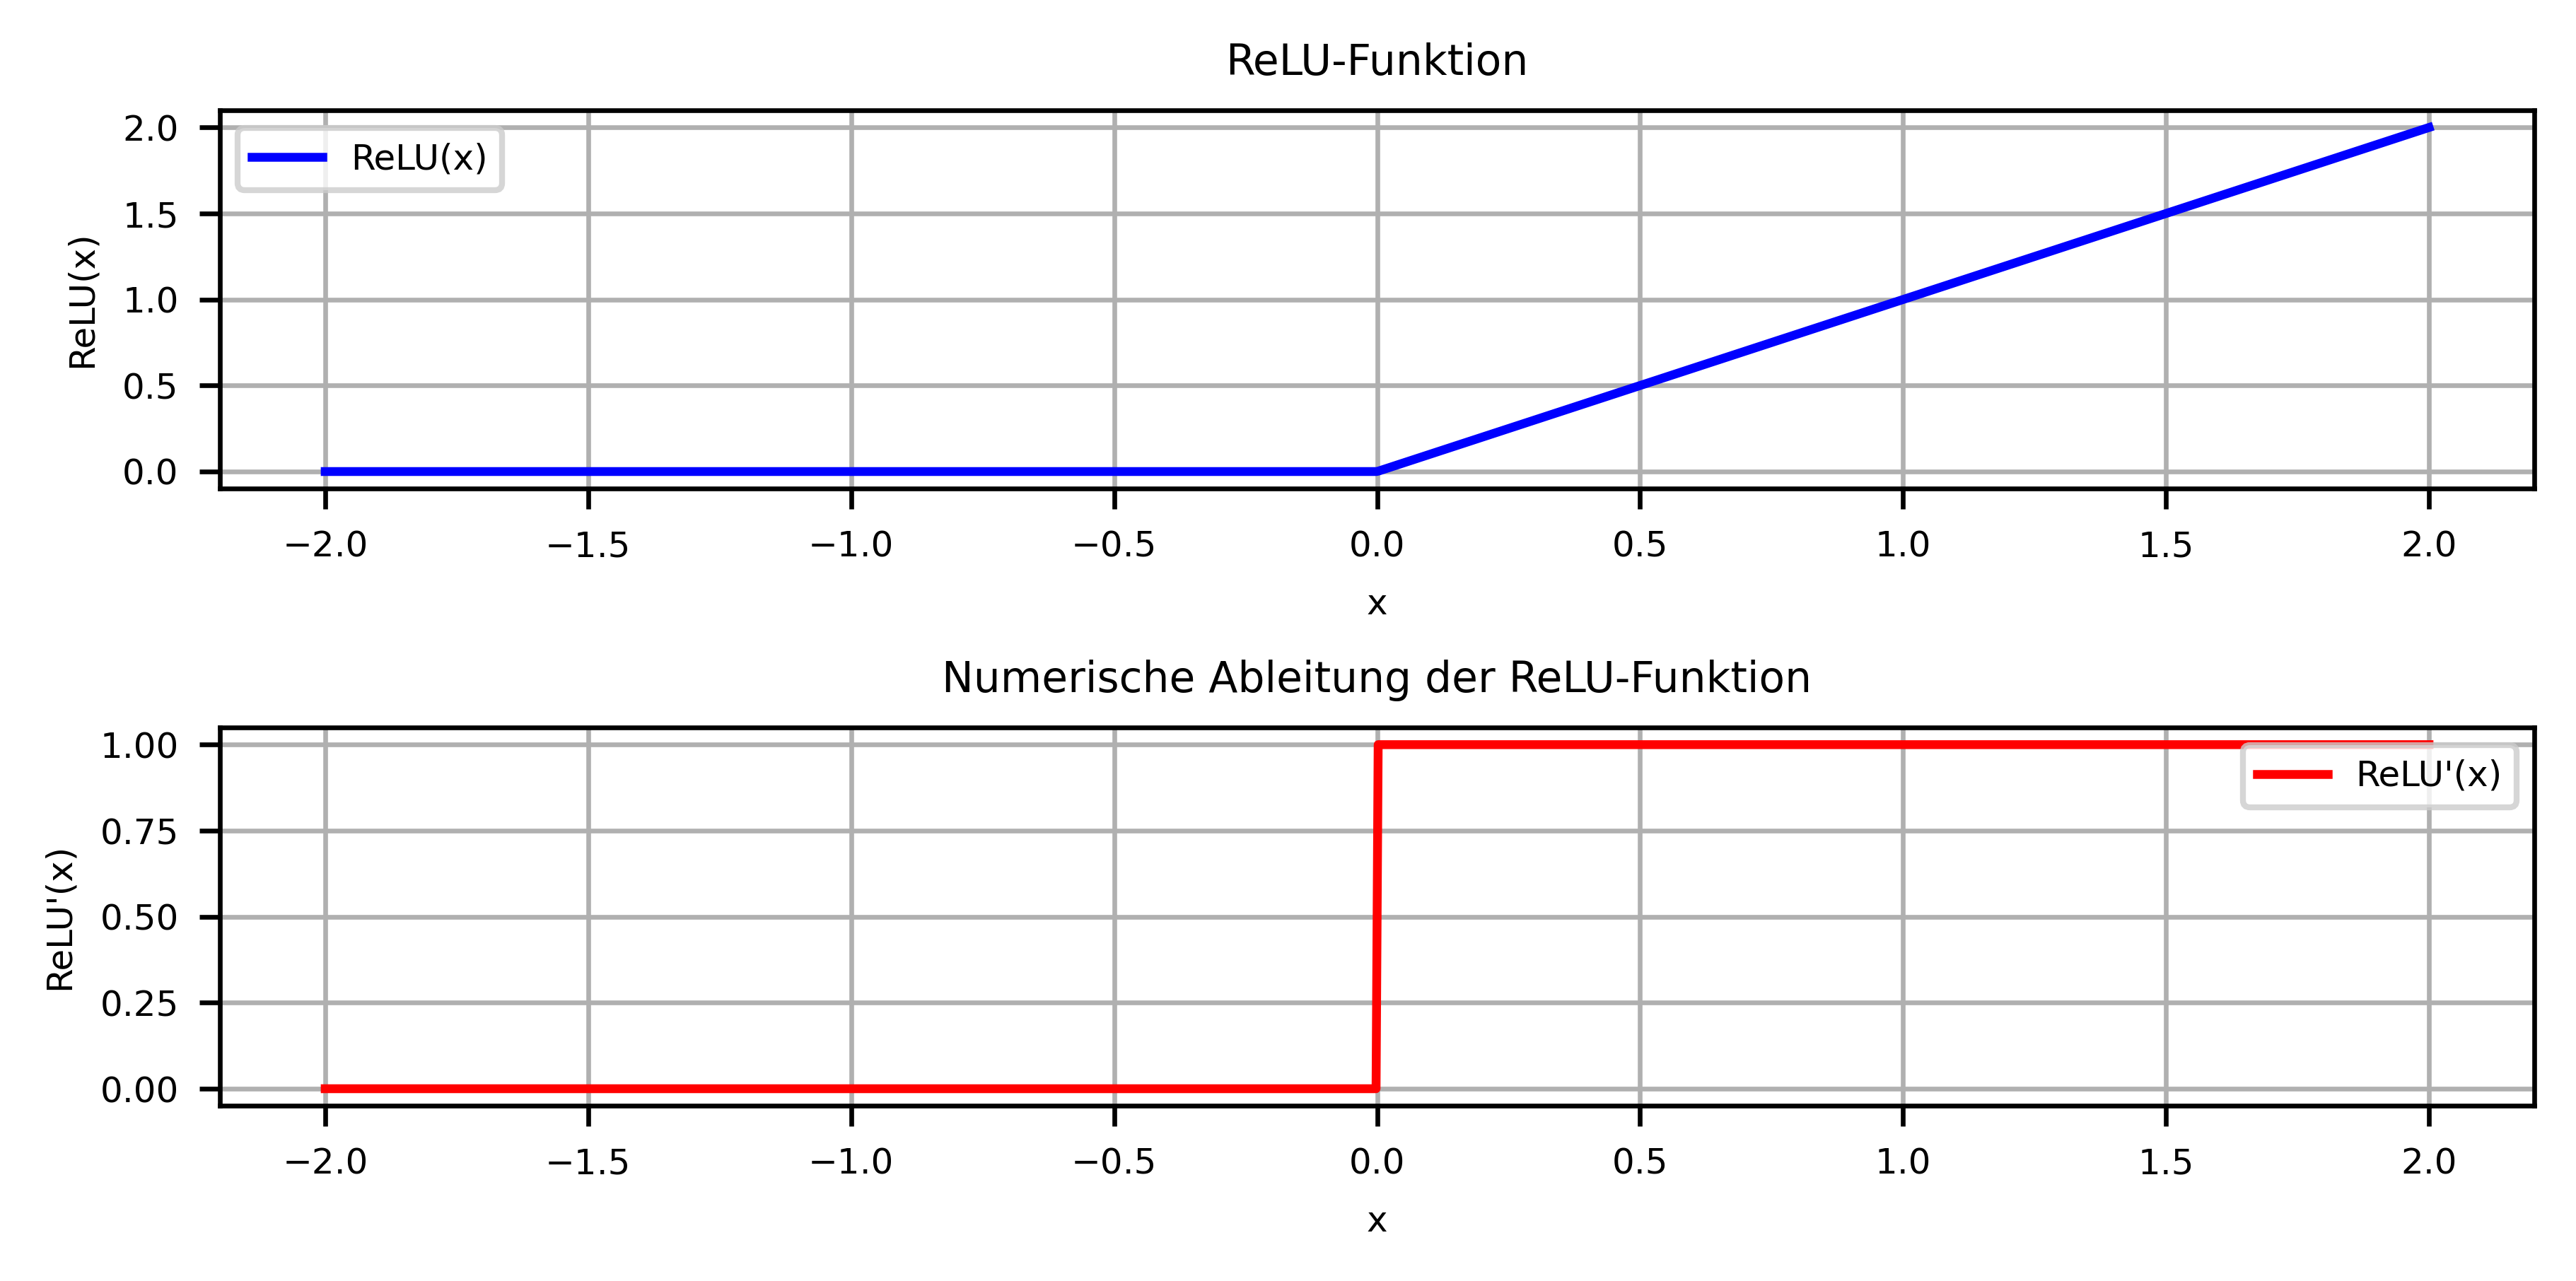

In [14]:
# Plot der ReLU-Funktion und ihrer numerischen Ableitung
plt.figure(dpi=600, figsize=(6, 3))
plt.rcParams.update({'font.size': 6})
plt.tight_layout()

# ReLU-Funktion
plt.subplot(2, 1, 1)
plt.plot(x, relu_func(x), label='ReLU(x)', color='blue')
plt.title('ReLU-Funktion')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.legend()

# Numerische Ableitung der ReLU-Funktion
plt.subplot(2, 1, 2)
plt.plot(x, derivative(relu_func, x, delta = 1e-5), label="ReLU'(x)", color='red')
plt.title('Numerische Ableitung der ReLU-Funktion')
plt.xlabel('x')
plt.ylabel("ReLU'(x)")
plt.grid(True)
plt.legend()

# Plot anzeigen
plt.tight_layout()
plt.show()


remove?

### Aktivierungsfunktionen

Gehen wir kurz auf eine weitere Feinheit des neuronalen Netzwerks ein, die Aktiviwerungsfunktion. Diese modulieren das weitergegebene Signal und sorgen für nichtlineare Modulation des Signals.

Eine wesentliche Eigenschaft von Aktivierungsfunktionen ist, **nichtlineare Zusammenhänge** abbilden zu können. Würden wir nur die lineare gewichtete Summe der Eingaben verwenden, würden wir im Wesentlichen nur lineare Funktion miteinander verknüpfen, wodurch wieder lineare Funktionen entstehen. Betrachten wir zum Beispiel die zwei linearen Funktionen $f(x) = 3 x +1$ und $g(x) = 4 x +2$. Dann kann man die Verkettung dieser Funktionen $f(g(x))$ wie folgt schreiben:

$$ f(g(x)) = 3 g(x) + 1 = 3 (4 x + 2) + 1 = 12 x + 7 $$

Das Ergebnis ist wieder eine lineare Funktion! Hingegen ist ein ausreichend großes künstliches neuronales Netzwerk mit nicht linearen Aktivierungsfunktionen in der Lage, jede stetige Funktion zu approximieren ({cite:t}`Geron.2020`, s.293 ).

Ein weiterer Vorteil bei der Verwendung von stetigen Aktivierungsfunktionen ist, dass die bisherige Beschränkung der Aktivierungszustände durch die Sprungfunktion auf die Werte $0$ und $1$ entfällt. Dies führt in der Ausgabeschicht dazu, dass die Zuordnung zu einer Klasse nicht mehr eindeutig mit $0$ oder $1$, sondern kontinuierlich beschrieben wird. Somit kann das künstliche neuronale Netz auch für Regressionen genutzt werden ({cite:t}`Matzka.2021`, s.123 ).

Eine häufig verwendete Aktivierungsfunktion ist in diesem Zusammenhang die aus der logistischen Regression bekannte **[Sigmoidfunktion](https://de.wikipedia.org/wiki/Sigmoidfunktion)**:

$$A(z) = \frac{1}{1 + e^{-z}} $$

Dabei ist $A(z)$ die Aktivierung des Neurons und $z = \sum_i w_i x_i +b$ die gewichtete Summe der Inputs. 

Die Sigmoidfunktion wird sowohl in verdeckten Schichten als auch als Ausgabeaktivierungsfunktion in **binären Klassifikationsnetzwerken** eingesetzt.

Eine der Sigmoidfunktion ähnliche Aktivierungsfunktion ist der **[Tangens hyperbolicus](https://de.wikipedia.org/wiki/Tangens_hyperbolicus_und_Kotangens_hyperbolicus)**:

$$\tanh (z) = \frac{\sinh (z)}{\cosh (z)} = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$

Beide Funktionen haben gemeinsam, den Wertebereich, auf den sie abbilden, einzuschränken. Im Fall der logistischen Funktion bildet diese beliebige Werte aus $\mathbb{R}$ auf das Intervall $[ 0  \ $ ,$ \ 1 ]$. Beim des Tangens hyperbolicus bildet dieser Werte aus $\mathbb{R}$ auf das Intervall $[ -1  \ $ ,$ \ 1 ]$ ab.

Die Berechnungen der Sigmoid- als auch der Tangens-hyperbolicus-Funktion sind vergleichsweise rechenzeitintensive Operationen, da in ihnen die Terme $e^{\pm z}$ berechnet und dividiert werden müssen. 

Als Alternative dient die **[Gleichrichterfunktion](https://de.wikipedia.org/wiki/Rectifier_(neuronale_Netzwerke))** (*engl. rectified linear unit, ReLU*). Diese hat den Vorteil, dass sie einfacher als einige andere Aktivierungsfunktionen wie die Sigmoidfunktion oder die Tangens-hyperbolicus-Funktion zu berechnen ist. Sie trägt auch zur Vermeidung des Problems des verschwindenden Gradienten bei, das bei tiefen neuronalen Netzwerken auftreten kann. Die **ReLU-Funktion** ist wie folgt definiert:

$$ A(z) = max(0,z) \begin{cases}
z & \text{für} \ z \gt 0, \\ 0 & \text{sonst}
\end{cases} $$

Obwohl für $z < 0$ bei den Werten der ReLU-Funktion keine Steigung existiert, zeigen ReLU-Aktivierungsfunktionen in künstlichen neuronalen Netzwerken eine sehr gute Optimierungsleistung und sind inzwischen eine der am häufigsten eingesetzten Aktivierungsfunktionen in tiefen neuralen Netzwerken.

Eine Erweiterung der ReLU-Funktion stellt die **[Leaky-ReLU-Funktion](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#Leaky_ReLU)** dar. Die Idee dahinter ist, dass auch negative Werte für $z$ eine geringe Steigung aufweisen, um das sogenannte **[Vanishing-Gradient-Problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)** zu umgehen. Die Leaky-ReLU-Funktion ist wie folgt definiert:

$$ A(z) \begin{cases}
z & \text{für} \ z \gt 0, \\ 0,01 \cdot z & \text{sonst}
\end{cases} $$

Eine weitere wichtige Aktivierungsfunktion für die **Ausgabeschicht von Klassifikationsnetzwerken** ist die **[Softmax-Funktion](https://de.wikipedia.org/wiki/Softmax-Funktion)**. Diese dient dazu, bei **Multiklassen-Klassifikation** die Wahrscheinlichkeitsverteilung der $K$ in unterschiedlichen möglichen Klassen zu berechnen. Die Softmax-Funktion ist in *Komponentenschreibweise* wie folgt definert:

$$ A(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}} $$

Für drei Klassen wäre die **Softmax-Funktion** zum Beispiel:

$$ A(z_1) = \frac{e^{z_1}}{e^{z_1}+e^{z_2}+e^{z_3}} \ , \   A(z_2) = \frac{e^{z_2}}{e^{z_1}+e^{z_2}+e^{z_3}} \ , \   A(z_3) = \frac{e^{z_3}}{e^{z_1}+e^{z_2}+e^{z_3}}$$

Die Summe der einzelnen Komponenten addiert sich dabei im Sinne einer Wahrscheinlichkeit der Zugehörigkeit zu einer von $j$-Klassen zu $1$ auf:

$$ A(z_1) +  A(z_2)+  A(z_3) = \frac{e^{z_1}}{e^{z_1}+e^{z_2}+e^{z_3}} + \frac{e^{z_2}}{e^{z_1}+e^{z_2}+e^{z_3}}+ \frac{e^{z_3}}{e^{z_1}+e^{z_2}+e^{z_3}} =  1 $$

Im Unterschied zur Ausgabeaktivierung von Netzwerken zur Klassifikation wird in der **Ausgabeschicht von Regressionsnetzwerken** eine **lineare Aktivierungsfunktion** verwendet, um kontinuierliche Werte zu erhalten, die auf kein bestimmtes Intervall beschränkt sind. Die lineare Aktivierungsfunktion kann wie folgt geschrieben werden:

$$A(z) = z$$

In der folgenden Abbildung sind die wichtigsten **Aktivierungsfunktionen** nochmals zusammengefasst dargestellt.

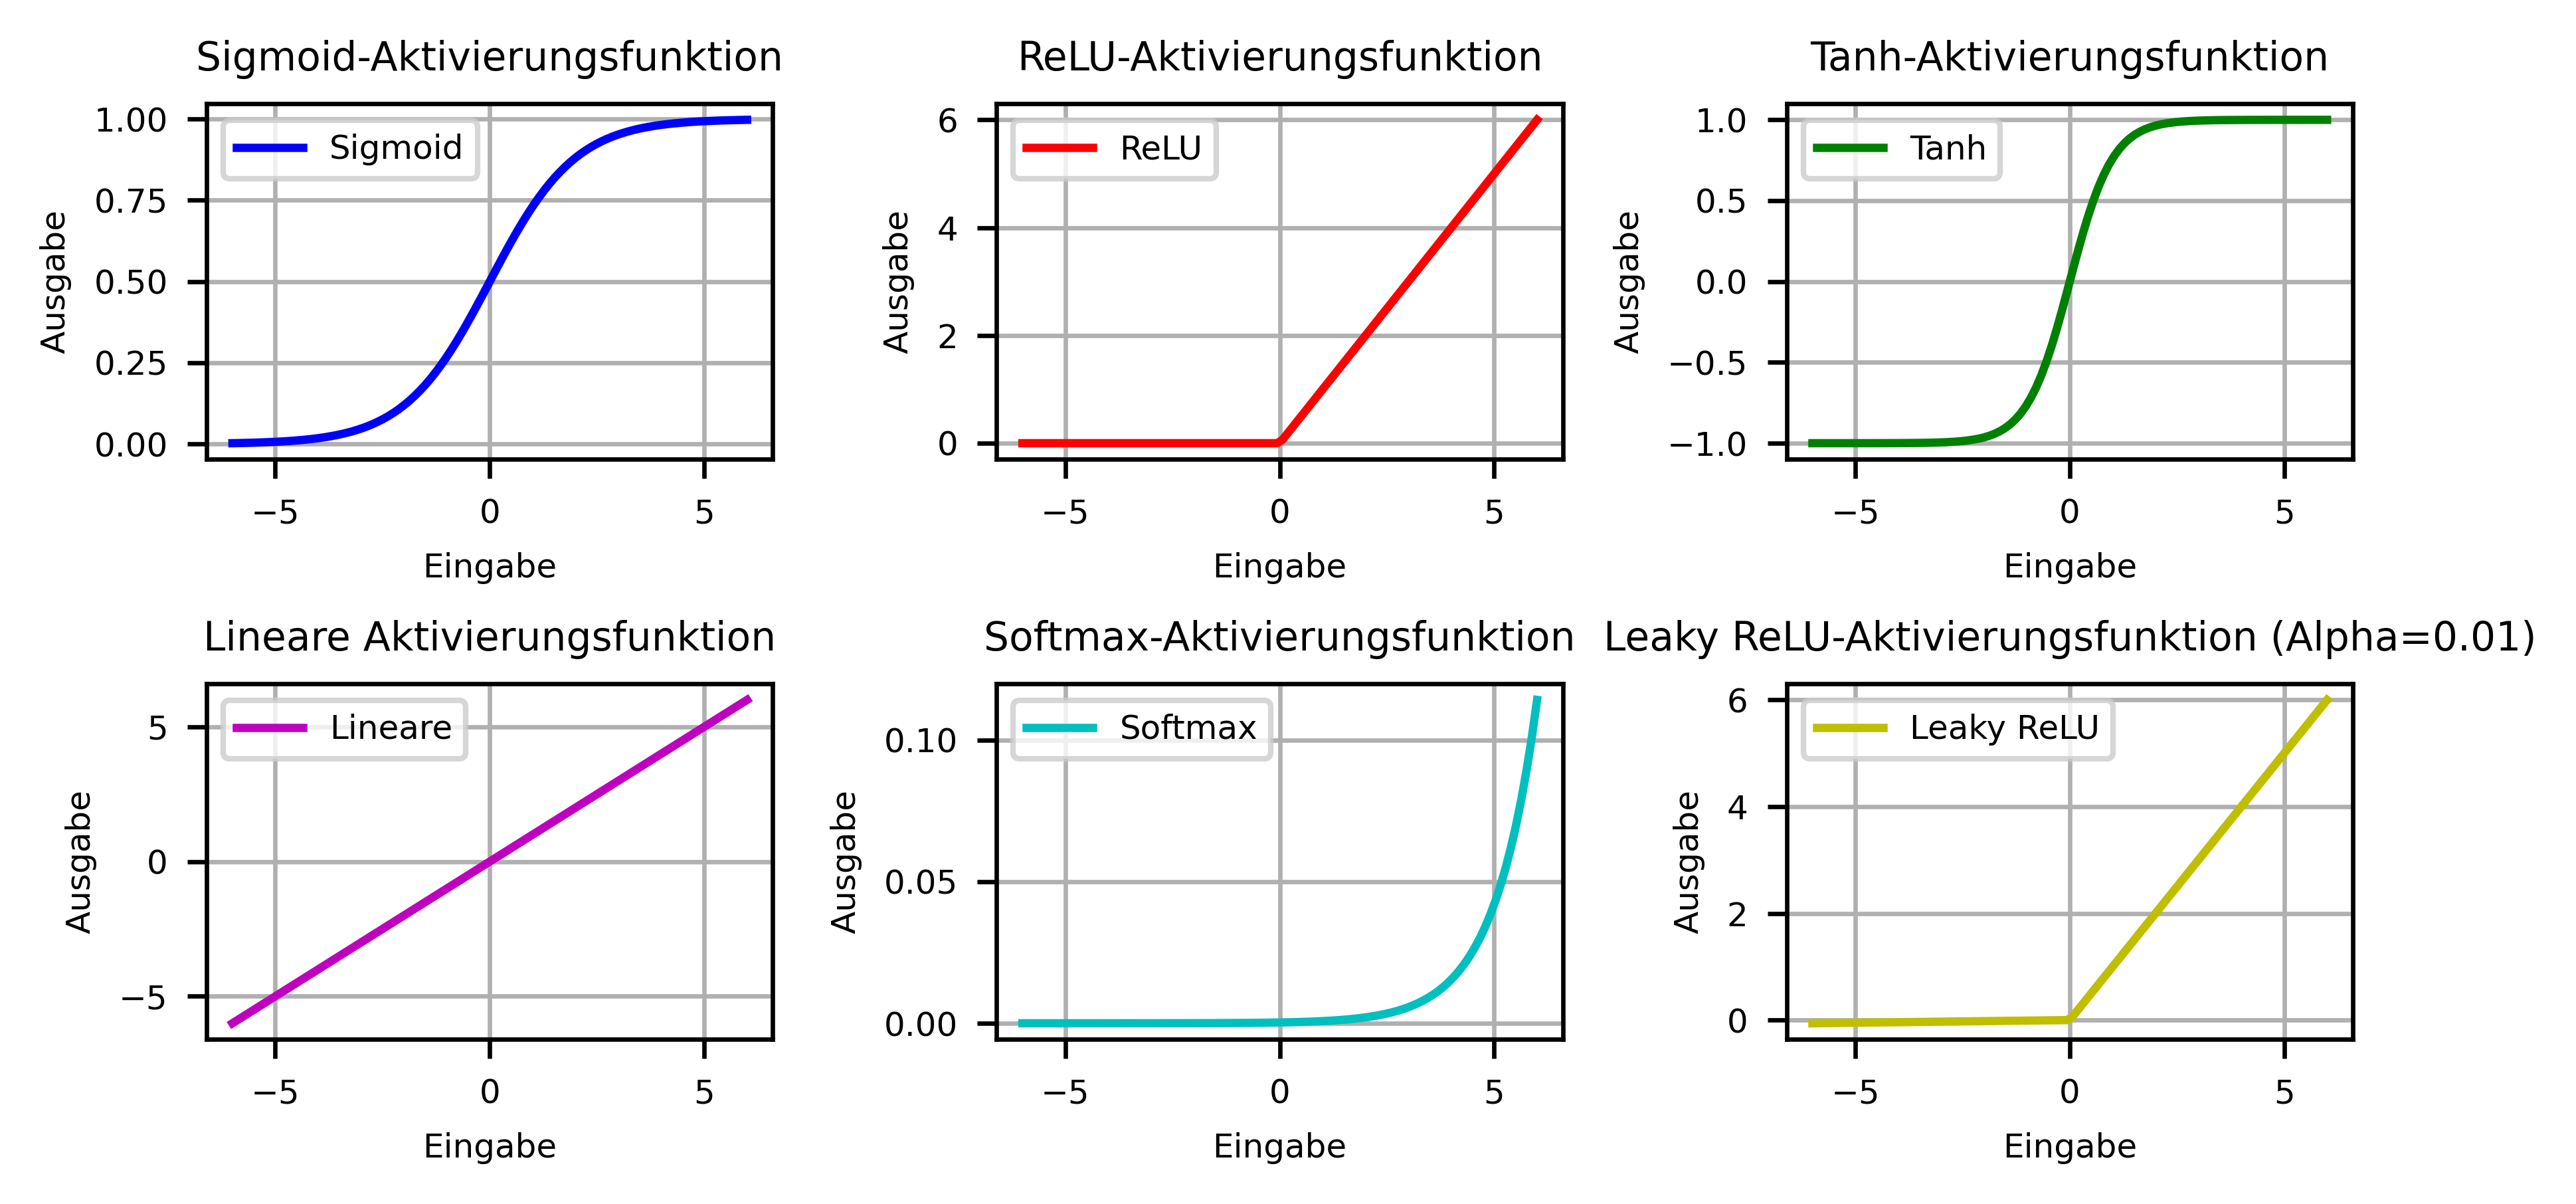

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Werte generieren
x = np.linspace(-6, 6, 100)
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)
linear = x
softmax = np.exp(x) / np.sum(np.exp(x), axis=0)
leaky_relu = np.where(x > 0, x, 0.01 * x)  # Leaky ReLU mit Alpha = 0.01

# Plot erstellen
plt.figure(dpi=600, figsize=(6, 3))
plt.rcParams.update({'font.size': 6})
plt.tight_layout()

# Sigmoid-Aktivierungsfunktion
plt.subplot(2, 3, 1)
plt.plot(x, sigmoid, label="Sigmoid", color="b")
plt.xlabel("Eingabe")
plt.ylabel("Ausgabe")
plt.title("Sigmoid-Aktivierungsfunktion")
plt.grid(True)
plt.legend()

# ReLU-Aktivierungsfunktion
plt.subplot(2, 3, 2)
plt.plot(x, relu, label="ReLU", color="r")
plt.xlabel("Eingabe")
plt.ylabel("Ausgabe")
plt.title("ReLU-Aktivierungsfunktion")
plt.grid(True)
plt.legend()

# Tanh-Aktivierungsfunktion
plt.subplot(2, 3, 3)
plt.plot(x, tanh, label="Tanh", color="g")
plt.xlabel("Eingabe")
plt.ylabel("Ausgabe")
plt.title("Tanh-Aktivierungsfunktion")
plt.grid(True)
plt.legend()

# Lineare Aktivierungsfunktion
plt.subplot(2, 3, 4)
plt.plot(x, linear, label="Lineare", color="m")
plt.xlabel("Eingabe")
plt.ylabel("Ausgabe")
plt.title("Lineare Aktivierungsfunktion")
plt.grid(True)
plt.legend()

# Softmax-Aktivierungsfunktion
plt.subplot(2, 3, 5)
plt.plot(x, softmax, label="Softmax", color="c")
plt.xlabel("Eingabe")
plt.ylabel("Ausgabe")
plt.title("Softmax-Aktivierungsfunktion")
plt.grid(True)
plt.legend()

# Leaky ReLU-Aktivierungsfunktion
plt.subplot(2, 3, 6)
plt.plot(x, leaky_relu, label="Leaky ReLU", color="y")
plt.xlabel("Eingabe")
plt.ylabel("Ausgabe")
plt.title("Leaky ReLU-Aktivierungsfunktion (Alpha=0.01)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Gradientenabstiegsverfahren (engl. Gradient Descent)

({cite:t}`Plaue.2021`, s.204 )

Beim klassischen **[Gradientenverfahren](https://de.wikipedia.org/wiki/Gradientenverfahren)** geht es darum, im Idealfall ein globales Maximum/Minimum einer gegebenen Funktion zu bestimmen, man spricht auch von einem sogenannten **[Optimierungsproblem](https://de.wikipedia.org/wiki/Optimierung_(Mathematik))**. Die Vorgehensweise ist dabei die Bildung des namensgebenden **[Gradienten](https://de.wikipedia.org/wiki/Gradient)** einer Funktion für alle unabhängigen Parameter. Dabei zeigt der Gradient in die Richtung des größten Anstiegs der Funktion. Um zum Minimum der Funktion zu kommen, wählen wir einen Startwert $w_{\text{alt}}$, der als Ausgangspunkt des iterativen Abstiegs zum Minimum dient, und gehen bei jedem Schritt des Gradientenverfahrens in Richtung des negativen Gradienten der Funktion, indem wir den Gradienten mal einer Lernrate $\alpha$ von $w_{\text{alt}}$ abziehen, um $w_{\text{neu}}$ zu berechnen. Allgemein kann man schreiben:

$$w_{\text{neu}} = w_{\text{alt}} - \alpha \cdot \nabla f(w) $$

Dabei ist $\nabla$ der **[Nabla-Operator](https://de.wikipedia.org/wiki/Nabla-Operator)**. Im eindimensionalen Fall entspricht er einfach der Ableitung nach der unabhängigen Variable.

Betrachen wir zum Beispiel, das Minimum der Funktion $f(x)= x^2$ zu bestimmen, um das Gradientenabstiegsverfahren zu verstehen.

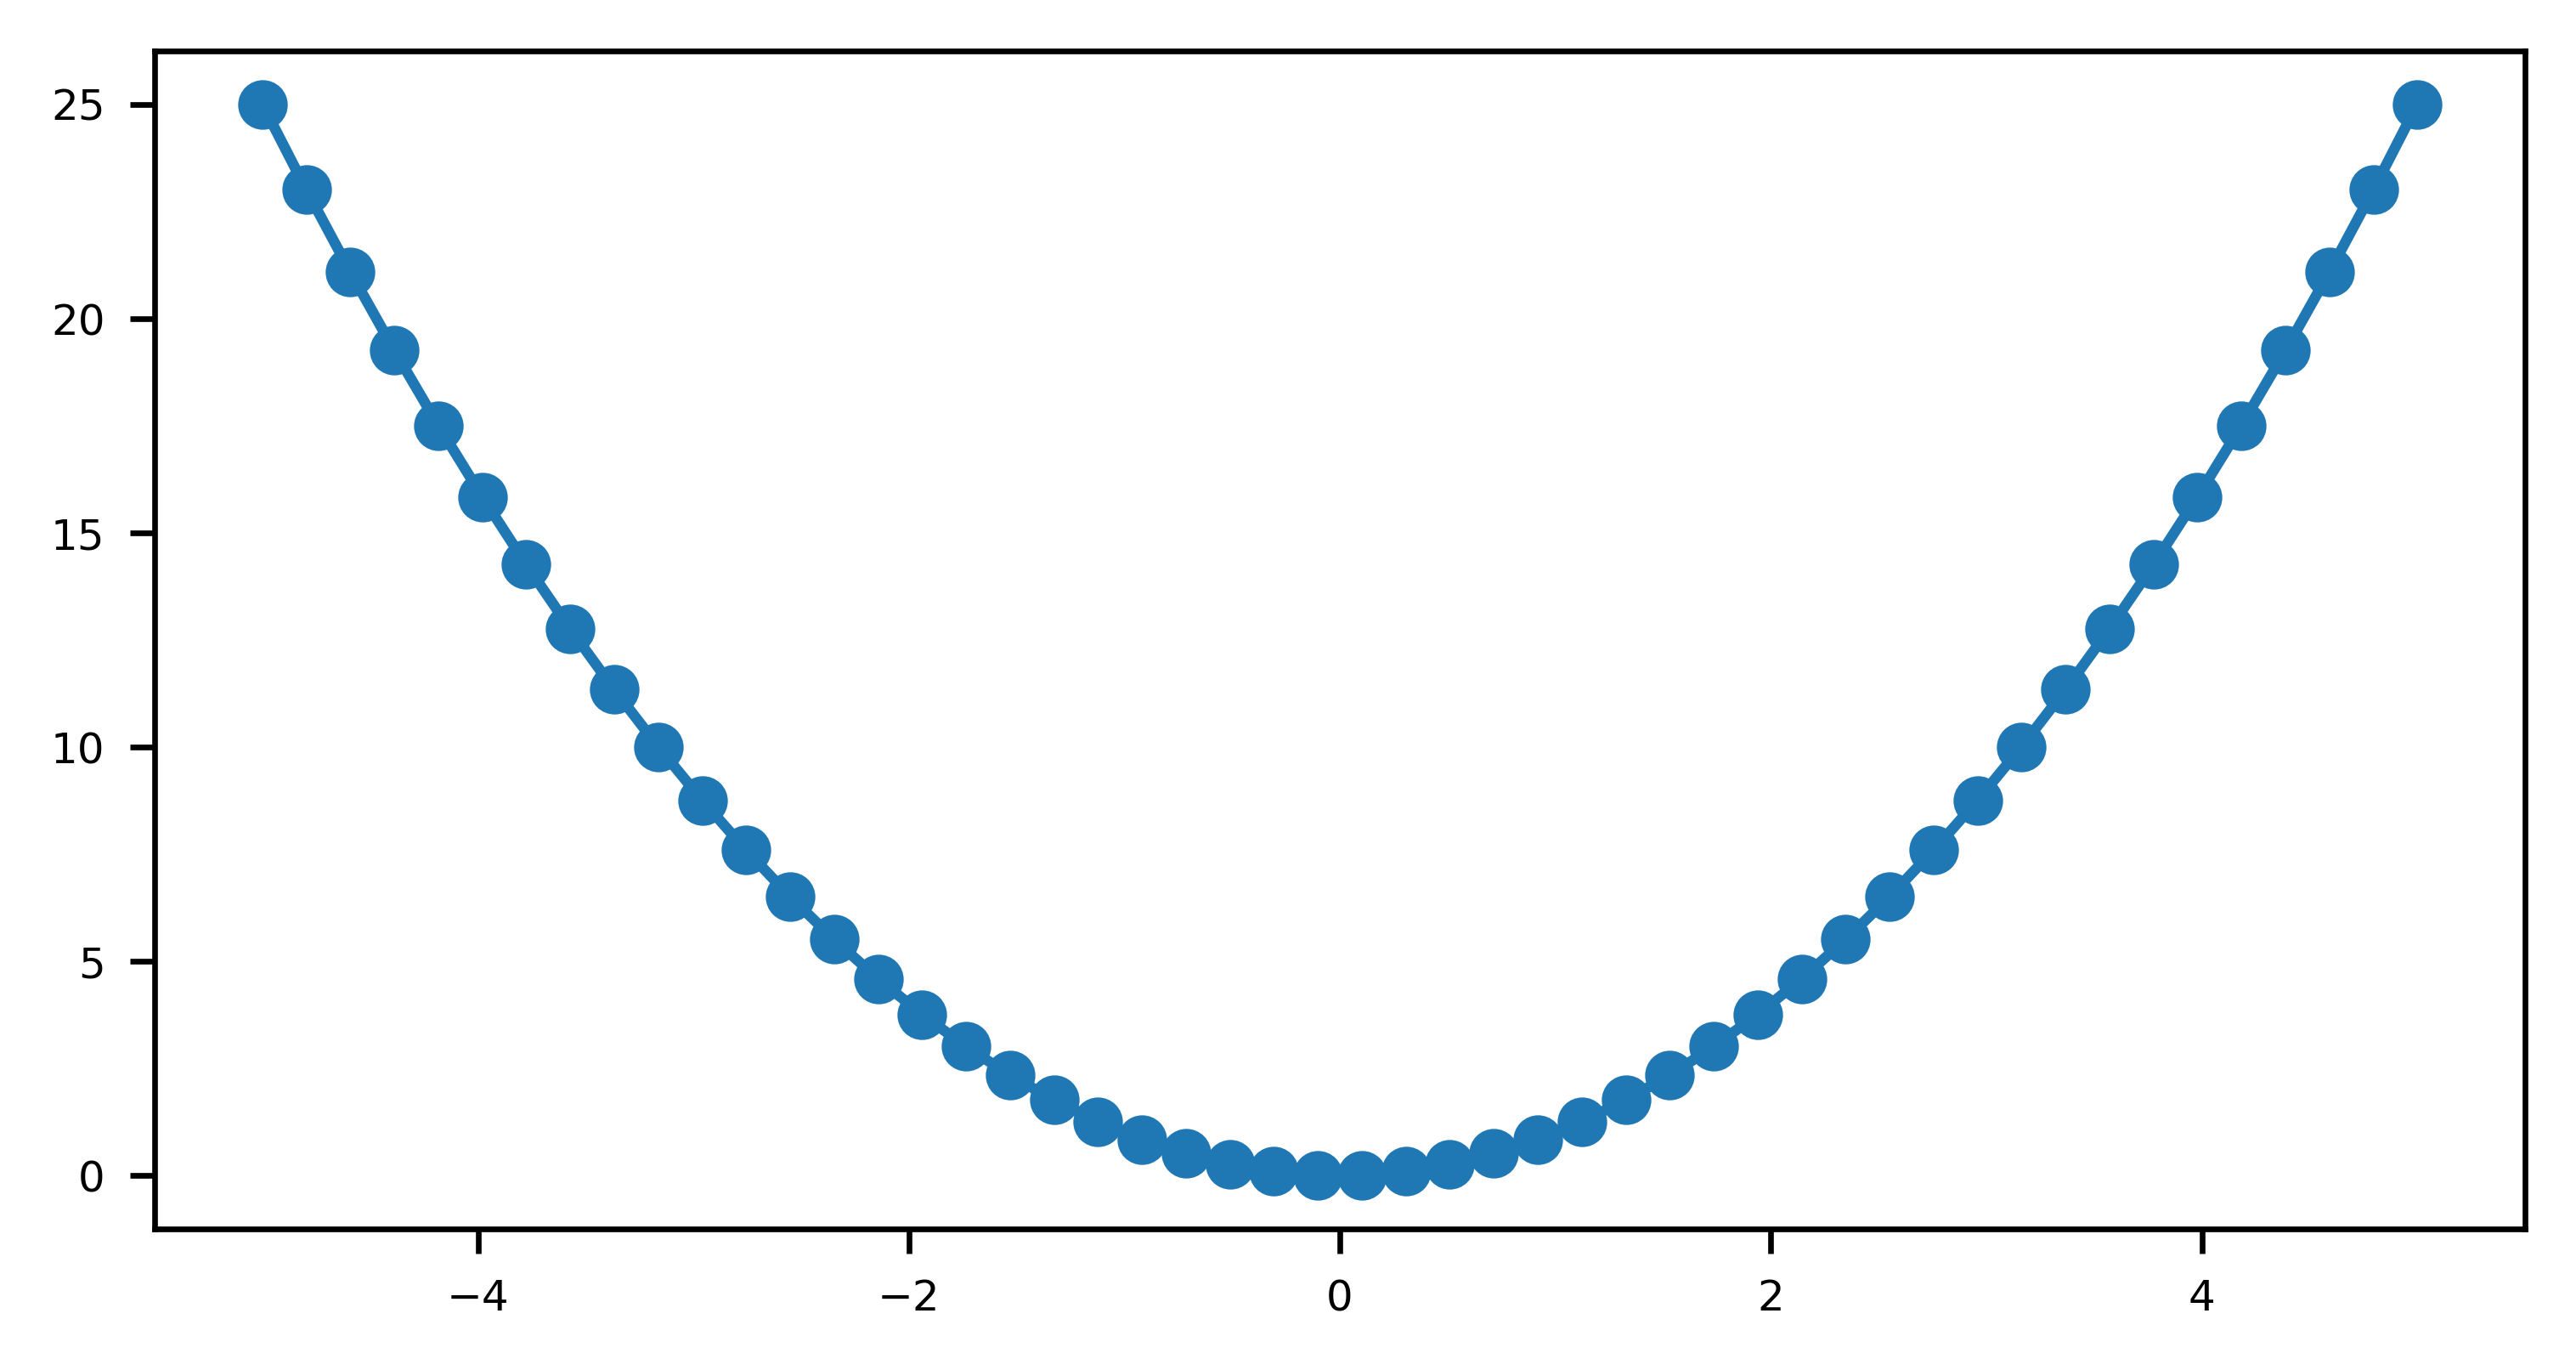

In [49]:
N = 50
x = np.linspace(-5, 5, N)
y = x**2
plt.figure(dpi=600, figsize=(6, 3))
plt.rcParams.update({'font.size': 6})
plt.tight_layout()
plt.plot(x, y)
_ = plt.scatter(x, y)

Wir bestimmen den Gradienten der Funktion $f(x)=x^2$:

$$\frac{df}{dx} = 2 x$$

Um das Minimum zu bestimmen, subtrahieren wir den Gradienten multipliziert mit einer Lernrate $\alpha$ von einem zufällig gewählten Startwert und iterieren so lange, bis der Gradient gegen $0$ konvergiert. Wir gehen somit in die Gegenrichtung des größten Zuwachses der Funktion mit jeder Iteration auf ein Minimum zu. In jedem Schritt berechnen wir den nächsten $x$-Wert mit:

$$x_{\text{neu}} = x_{\text{alt}} - \alpha \cdot \frac{df}{dx} = x_{\text{alt}} - \alpha \cdot 2 x$$

Sehen wir uns dazu ein Code-Beispiel an:

In [17]:
x_alt = 5
alpha = 0.1

In [18]:
for i in range(0, 30):
    x_neu = x_alt - alpha * (2 * x_alt)
    x_alt = x_neu
x_neu

0.006189700196426903

Wie wir sehen können, konvergiert der Wert für $x_{\text{neu}}$ gegen das Minimum von $f(x)$ bei $x = 0$.

In der folgenden Abbildung sehen Sie die ersten drei Schritte beim Gradientenabstiegsverfahren mit Lernrate `alpha = 0.1` und ausgehend vom Startpunkt `x_alt = 5`. Beachten Sie, dass die Schrittweite abnimmt, je näher wir dem Minimum kommen.

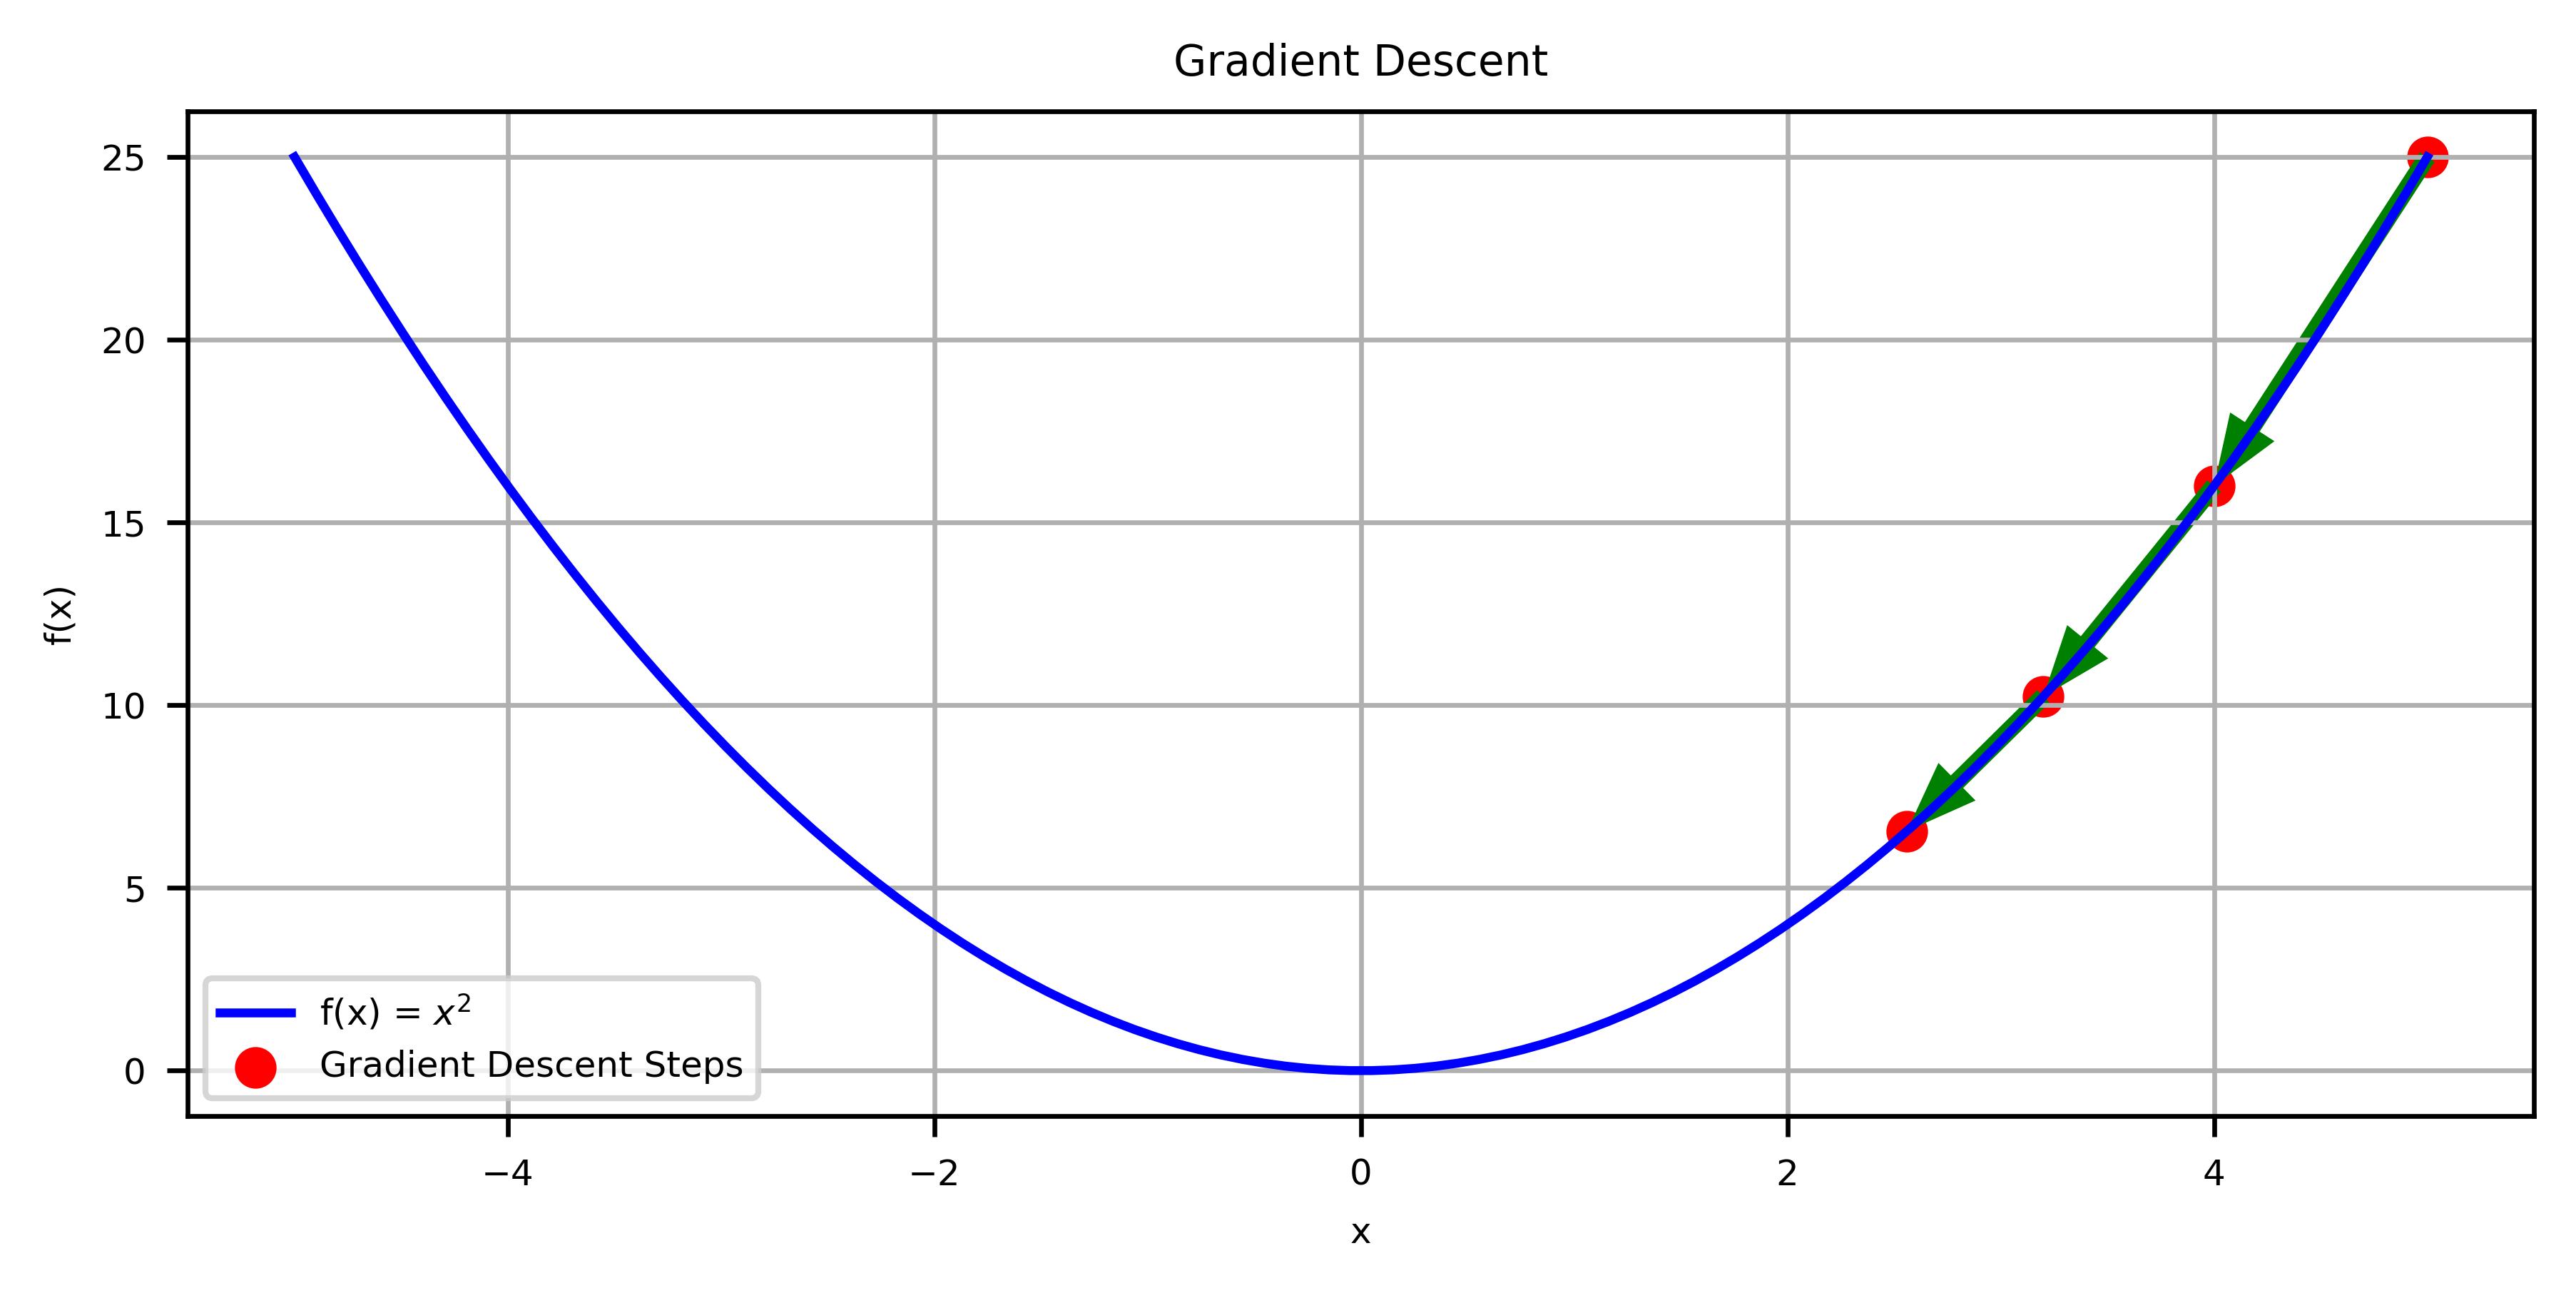

In [50]:
# Zielfunktion und deren Ableitung
def f(x):
    return x**2


def df(x):
    return 2 * x


# Startpunkt und Lernrate für den Gradientenabstieg
x_start = 5.0
alpha = 0.1

# Anzahl der Schritte
num_steps = 3
x_history = [x_start]

# Gradientenabstieg durchführen und die Pfeile zeichnen
for _ in range(num_steps):
    x_current = x_start
    x_start = x_start - alpha * df(x_start)
    x_history.append(x_start)

# X-Werte für die Funktion
x = np.linspace(-5, 5, 100)

# Diagramm erstellen
plt.figure(dpi=600, figsize=(6, 3))
plt.plot(x, f(x), label="f(x) = $x^2$", color="blue")
_ = plt.scatter(
    x_history, [f(x) for x in x_history], color="red", label="Gradient Descent Steps"
)

# Pfeile zeichnen, die die Schritte des Gradientenabstiegs verbinden
for i in range(1, len(x_history)):
    dx = x_history[i] - x_history[i - 1]
    dy = f(x_history[i]) - f(x_history[i - 1])
    plt.quiver(
        x_history[i - 1],
        f(x_history[i - 1]),
        dx,
        dy,
        angles="xy",
        scale_units="xy",
        scale=1,
        color="green",
        width=0.0075,
        headaxislength=4,
        headlength=4,
    )

plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Gradient Descent")
plt.grid(True)
plt.rcParams.update({'font.size': 6})
plt.tight_layout()
plt.show()

Die Konvergenzgeschwindigkeit (die notwendige Anzahl an Schritten) ist dabei von der Lernrate und dem zufällig gewählten Startpunkts abhängig. Dabei gilt es, einen Mittelweg zwischen einer **zu kleinen Lernrate**, die zu einer unnötig **hohen Anzahl von Schritten** führt, und einer **zu hohen Lernrate**, die zu **oszillierenden Lösungen** führt, da sie immer wieder über das Minimum hinweg springt, zu finden. Oft ist das Finden der besten Lernrate ein iterativer Prozess des Experimentierens. Sie können mit verschiedenen Lernrateneinstellungen beginnen (z.B. $0.1$, $0.01$, $0.001$) und die Leistung auf einem Validierungsdatensatz überwachen.

# Einfaches neuronales Netzwerk from scratch

### Erstellen der Eingabeschicht

Bild Eingabeschicht

In [87]:
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output_input_layer = inputs[0] * weights[0] + inputs[1] * weights[1] + inputs[2] * weights[2] + bias
output_input_layer

2.3

In [89]:
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1.0]

weights2 = [0.5, -0.91, 0.26, -0.5]

weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2

bias2 = 3

bias3 = 0.5

check?

$$ \text{Input} = \sum_{i=1}^N x_i w_i + b_i$$

In [107]:
output_layer_1 = [inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,
           inputs[0] * weights2[0] + inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights2[3] + bias2,
           inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3]



print(output_layer_1)

[4.8, 1.21, 2.385]


Die Eingaben oder Inputs können nicht direkt verändert werden. Wir können allerdings durch Anpassung der Gewicht und des Bias erreichen, dass das neuronale Netzwerk bessere Voraussagen trifft. Der Algorithmus für diese systematische Anpassung, ähnlich der vorher benutzten Lernregel des Perzeptrons, ist das Backpropagationverfahren.

### Warum Gewichte UND Bias ?

In [113]:
input_value = -0.5

weight = 0.85

bias = 0.9

print(input_value * weight)

print(input_value + bias)

-0.425
0.4


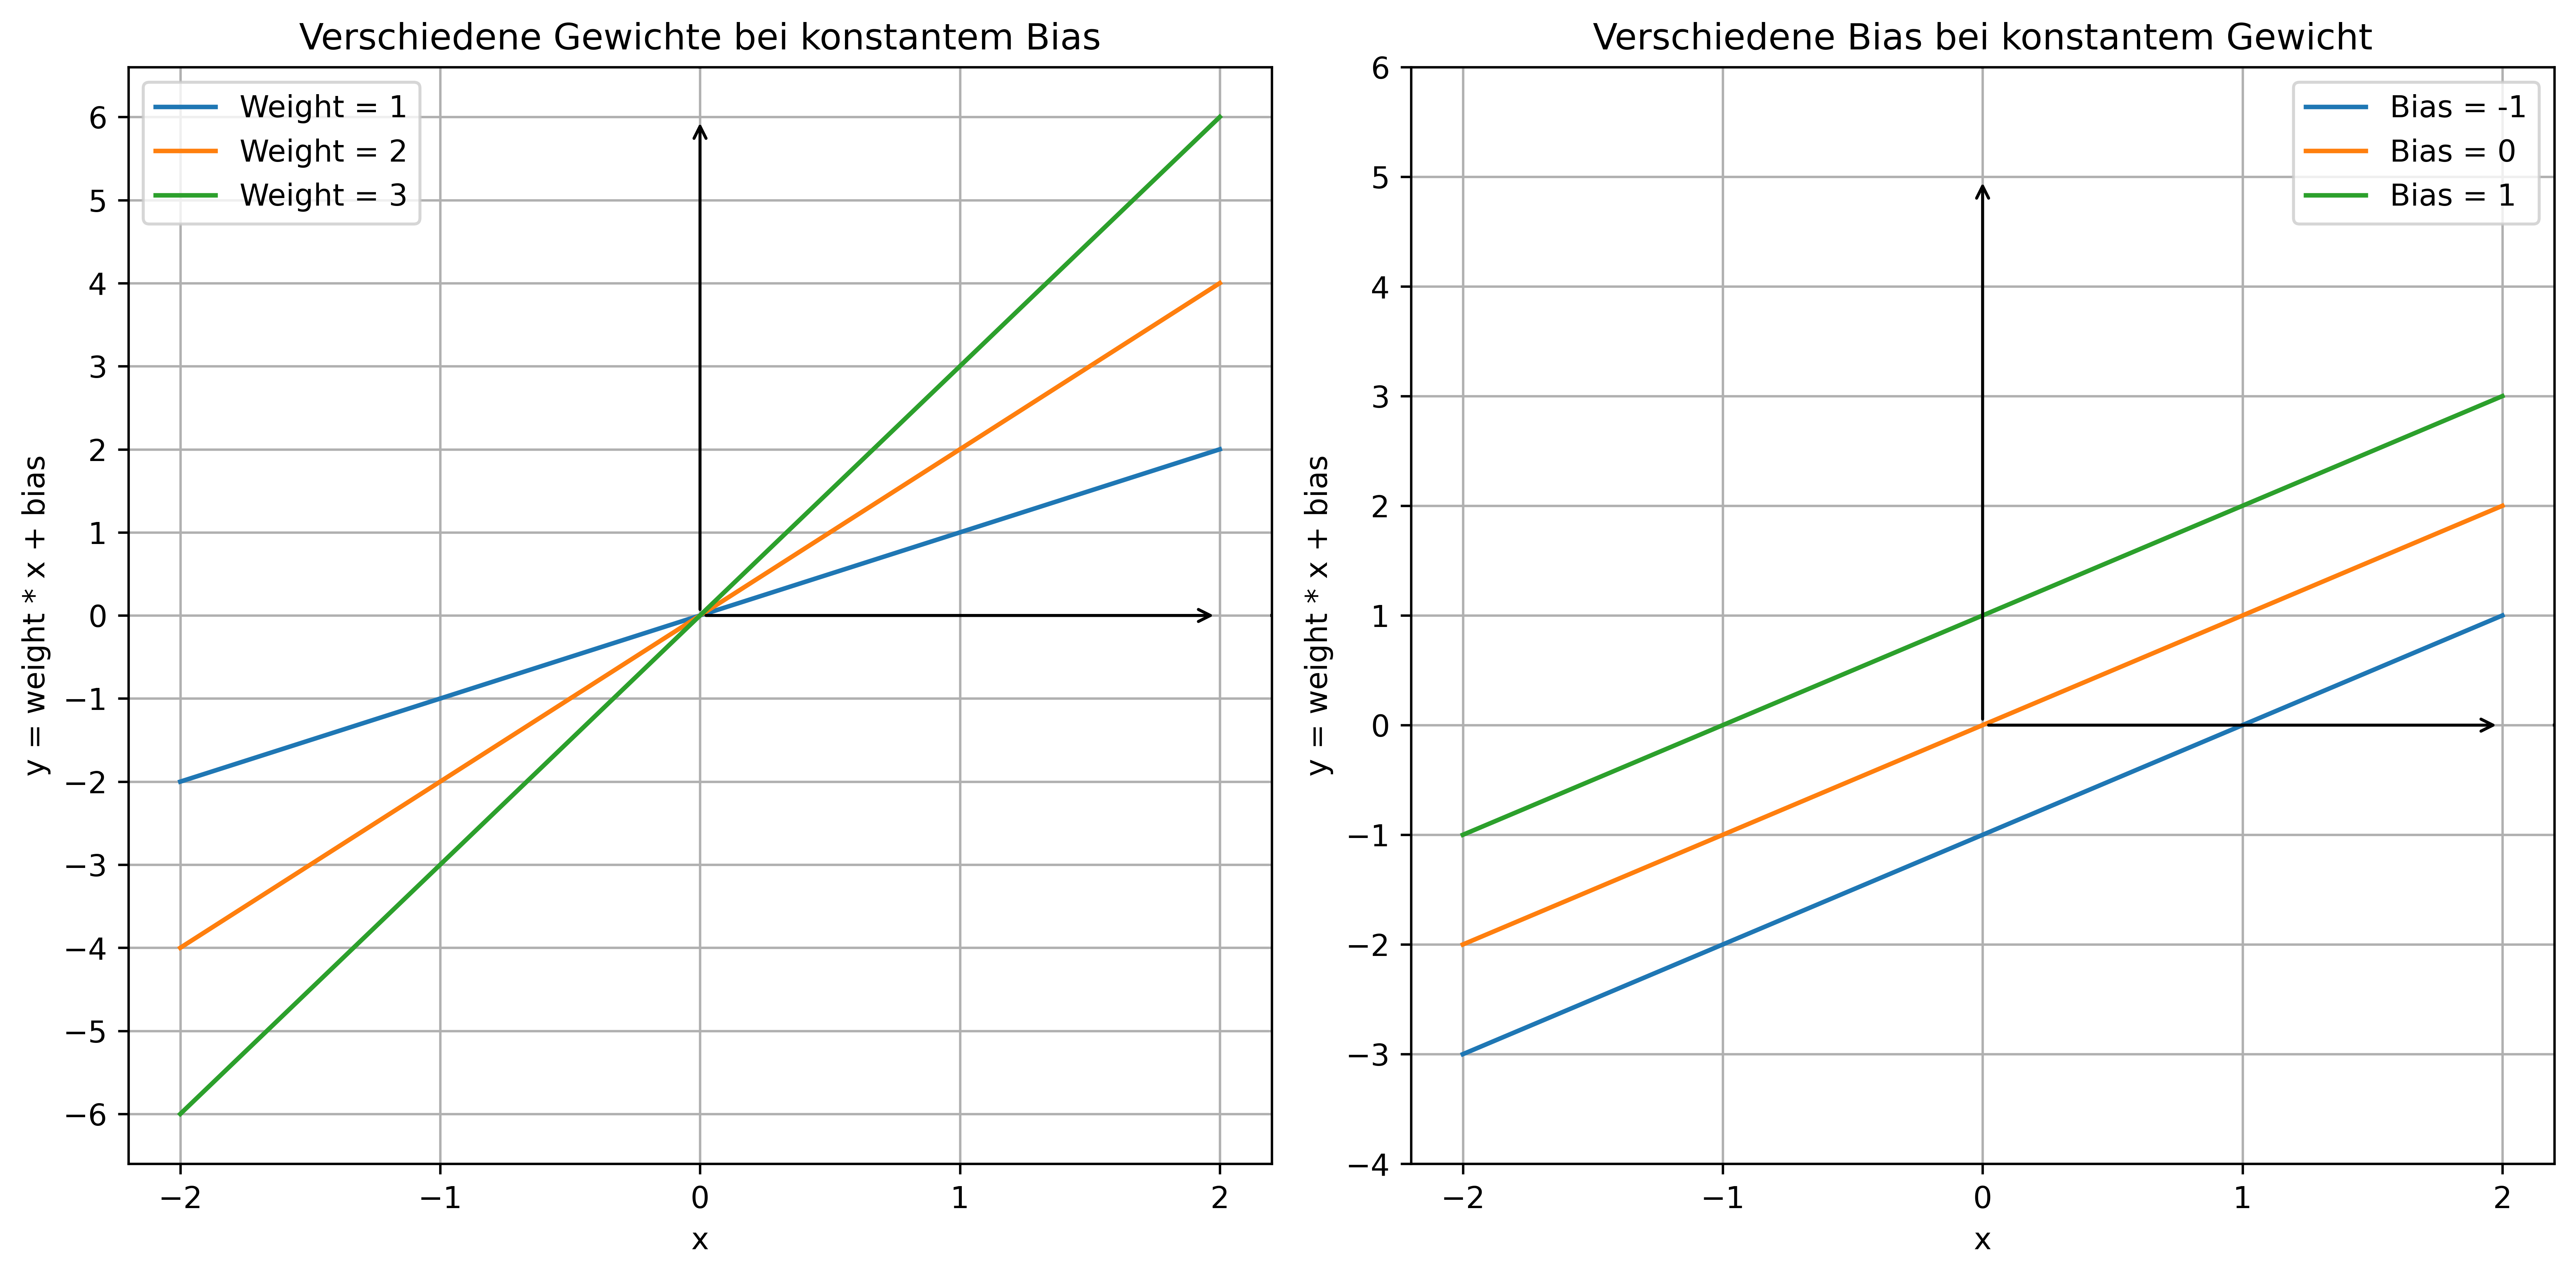

In [51]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10})
# Werte für Gewicht und Bias
weights = [1, 2, 3]  # Gewichtswerte
bias_values = [0]  # Bias für den ersten Plot (Bias = 0)
weight_constant = 1  # Konstanter Wert für Gewicht im zweiten Plot
bias_values_2 = [-1, 0, 1]  # Verschiedene Bias-Werte für den zweiten Plot

# Erstellen Sie ein Figure mit zwei Subplots nebeneinander
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi = 600)

# Plot für die Gewichtswerte mit Bias = 0
for weight in weights:
    ax1.plot([-2, -1, 0, 1, 2], [weight * x + 0 for x in [-2, -1, 0, 1, 2]], label=f"Weight = {weight}")
ax1.set_title("Verschiedene Gewichte bei konstantem Bias")
ax1.set_xlabel("x")
ax1.set_ylabel("y = weight * x + bias")
ax1.legend()
ax1.grid(True)
ax1.set_xticks(np.arange(-2,3,1))
ax1.set_yticks(np.arange(-6,7,1))
ax1.axhline(0, 2, color='black',linewidth=1)  # horizontale Linie (x-Achse)
ax1.axvline(0, 6, color='black',linewidth=1)
ax1.annotate('', xy=(2, 0), xytext=(0, 0), arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))
ax1.annotate('', xy=(0, 6), xytext=(0, 0), arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))


# Plot für konstanten Weight = 1 und verschiedenen Bias-Werten
for bias in bias_values_2:
    ax2.plot([-2, -1, 0, 1, 2], [weight_constant * x + bias for x in [-2, -1, 0, 1, 2]], label=f"Bias = {bias}")
ax2.set_title("Verschiedene Bias bei konstantem Gewicht")
ax2.set_xlabel("x")
ax2.set_ylabel("y = weight * x + bias")
ax2.legend()
ax2.grid(True)
ax2.set_xticks(np.arange(-2,3,1))
ax2.set_yticks(np.arange(-4,7,1))
ax2.axhline(0, 2, color='black',linewidth=1)  # horizontale Linie (x-Achse)
ax2.axvline(0, 5, color='black',linewidth=1)
ax2.annotate('', xy=(2, 0), xytext=(0, 0), arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))
ax2.annotate('', xy=(0, 5), xytext=(0, 0), arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))

# Plot anzeigen
plt.tight_layout()

plt.show()


## Mathematische Grundlagen für ein neuronales Netzwerk 

* Vektoren und Matrizen für prägnantere Formulierung

* Differentialrechnung für Anpassung der Gewichte (Lernen)

### Vektoren, Matrizen und Tensoren in `NumPy`

### Vektoren 

(Westermann, Mathematik für Ingenieure - Band 1, S.39-135)

Das **Skalarprodukt** zweier Vektoren $\vec{a}=\begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix}$ und $\vec{b}=\begin{pmatrix}
4 \\
5 \\
6
\end{pmatrix}$ ist gegeben durch:

$$\vec{a} \cdot \vec{b}=
\begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix}
\cdot
\begin{pmatrix}
4 \\
5 \\
6
\end{pmatrix}
=
1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6 = 4 + 10 + 18 = 32
$$

Wir können in `NumPy`-Arrays mit der Funktion `array()` erstellen, indem wir Zeilen und Spalten als Listen übergeben. Die beiden Vektoren $\vec{a}$ und $\vec{b}$ aus dem obigen Beispiel können wir folgendermaßen in `NumPy` anschreiben:

In [137]:
a = np.array([1,2,3])

b = np.array([4,5,6])

In `NumPy` können wir das Skalarprodukt zweier Vektoren mit der Funktion `dot()` oder dem Symbol `@` berechnen:

In [138]:
np.dot(a,b)

32

In [139]:
a @ b

32

### Matrizen

Eine Matrix setzt sich aus Spalten- beziehungsweise Zeilenvektoren zusammen, dabei besteht eine $(m \times n)$-Matrix aus $m$ Zeilen und $n$ Spalten. Das untere Beispiel stellt also eine $(3 \times 3)$ Matrix dar:

$$A =\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}$$

Beachten Sie, dass Matrizen insofern eine Verallgemeinerung von Vektoren darstellen, da diese dem Spezialfall einer $(n \times 1)$ Matrix entsprechen. Wir können die oben angegebene Matrix $A$ in `NumPy` anschreiben, indem wir Zeilen und Spalten als Liste von Listen übergeben.

In [24]:
a = np.array([[1],[2],[3]])

A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

### Multiplikation von Vektoren mit Matrizen

$\vec{a}=\begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix}$ , $A =\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}$

$A \cdot \vec{a} = \begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
\cdot
\begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix}=
\begin{pmatrix}
1 \cdot 1 + 2 \cdot 2 + 3 \cdot 3 \\
4 \cdot 1 + 5 \cdot 2 + 6 \cdot 3 \\
7 \cdot 1 + 8 \cdot 2 + 9 \cdot 3
\end{pmatrix}=
\begin{pmatrix}
14 \\
32 \\
50
\end{pmatrix}
$ 

In [26]:
np.dot(A,a)

array([[14],
       [32],
       [50]])

In [28]:
np.dot(a.T,A)

array([[30, 36, 42]])

In [115]:
output = np.dot(weights_array[0], inputs) + biases[0]
output

4.8

In [116]:
output = np.dot(weights_array, inputs) + biases
output

array([4.8  , 1.21 , 2.385])

### Dimension von Vektoren, Matrizen und Tensoren

### Vektoren

*Hinweis*: Ein $n$-dimensionales Array wird in `NumPy` ohne weitere Spezifizierung nicht im mathematischen Sinn in Zeilen- oder Spaltenvektor unterschieden sondern nach den sogenannten Broadcasting Regeln interpretiert.

In [120]:
vector = np.array([1,2,3,4])

In [121]:
vector.shape

(4,)

Um einen Vektor eindeutig in `NumPy` festzulegen können wir mit zusätzlichen eckigen Klammern die fehlende Dimension angeben.

#### Beispiel: Spaltenvektor

$
\vec{a}
= 
\begin{pmatrix}
1 \\
2 \\
3 \\
4
\end{pmatrix}
$

In [51]:
vector_column = np.array([[1],[2],[3],[4]])

In [52]:
vector_column.shape

(4, 1)

#### Beispiel: Zeilenvektor

$
\vec{b}
= 
\begin{pmatrix}
1 & 2 & 3 & 4
\end{pmatrix}
=
\vec{a}^T
$

In [53]:
vector_row = np.array([[1, 2, 3, 4]])

In [54]:
vector_row.shape

(1, 4)

Wir können Vektoren in `NumPy` mit der Syntax `vector.T` transponieren:

In [55]:
vector_column.T.shape

(1, 4)

### Matrizen

Matrizen besitzen Dimensionen entsprechend ihrer Anzahl an Zeilen $m$ und Spalten $n$:

#### Beispiel: $4 \times 4$ Matrix

$A =
\begin{pmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12 \\
13 & 14 & 15 & 16
\end{pmatrix}
$

In [48]:
A_matrix = np.array([[1,2,3,4],
                 [5,6,7,8],
                 [9,10,11,12],
                 [13,14,15,16]])

In [49]:
A_matrix.shape

(4, 4)

Ähnlich wie Vektoren können Matrizen auch durch das Vertauschen von Zeilen und Spalten transponiert werden:

$A^T=
\begin{pmatrix}
1 & 5 & 9 & 13 \\
2 & 6 & 10 & 14 \\
3 & 7 & 11 & 15 \\
4 & 8 & 12 & 16
\end{pmatrix}
$

In [56]:
A_matrix.T

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

### Tensoren

Tensoren schließlich können beliebig viele Dimensionen $(m \times n  \times  o  \times ...)$ besitzen. Vielleicht am anschaulichsten kann man sich dies anhand eines Tensors mit $3$ Dimensionen vorstellen, der als mehrere räumlich angeordnete Matrizen gedacht werden kann.  

#### Beispiel: $4 \times 3 \times 2$ Tensor

$
\begin{array}{c@{\hskip 20pt}c@{\hskip 20pt}c@{\hskip 20pt}c}
\begin{bmatrix}
1 & 2 \\
1 & 2 \\
1 & 2
\end{bmatrix} 
& & &  & \\
& \ddots  &  & \\
& & &  & \\
& &   \begin{bmatrix}
3 & 4 \\
3 & 4 \\
3 & 4
\end{bmatrix}
& & & & & &  \\
& & & & \ddots &   \\
& & & & & &  \\
& & & & & & \begin{bmatrix}
5 & 6 \\
5 & 6 \\
5 & 6
\end{bmatrix} 
& & & & & & & & &  \\
& & & & &  & & & \ddots   \\
& & & & & & & & & \\
& & & & & & & & &&
 \begin{bmatrix}
7 & 8 \\
7 & 8 \\
7 & 8
\end{bmatrix}
\end{array}
$

In [57]:
tensor = np.array([[[1,2],
                 [1,2],
                 [1,2]],
                 [[3,4],
                  [3,4],
                  [3,4]],
                  [[5,6],
                   [5,6],
                   [5,6]],
                   [[7,8],
                    [7,8],
                    [7,8]]
                 ])

In [58]:
tensor.shape

(4, 3, 2)

#### Challenge: Sie den Vektor $\vec{a}=\begin{pmatrix}
5 \\
-7 \\
42
\end{pmatrix}
$ als `NumPy`-Array an. Wie sieht der transponierte Vektor von $\vec{a}$ aus?

#### Challenge: Schreiben Sie eine beliebige $3 x 2$ Matrix als `NumPy`-Array an.

#### Challenge: Ergänzen Sie die $3 x 2$ Matrix aus dem vorherigen Beispiel auf die Dimensionen $4 x 3 x 2$.

### Batches

**Was sind Batches?**

- Anzahl der Datenpunkte aus Features/Merkmale die gleichzeitig in das Netzwerk eingespeist werden

**Warum Batches?**

- Parallelisierung von Berechnungen

- Verbesserung der Generalisierungsfähigkeit des Modells

**Warum nicht alle Datenpunkte gleichzeitig?**

- Problem von Overfitting, schlechtere Generalisierungsfähigkeit für unbekannte Daten

### Eingabeschicht

check?

Wir versuchen aus den bisherigen theoretischen Überlegungen ein neuronales Netzwerk zu erstellen.

In [59]:
inputs =  [[1, 2, 3, 2.5],
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]

inputs = np.array(inputs) # Erzeuge NumPy-Array der Inputs

weights_input_layer = [[0.2, 0.8, -0.5, 1.0], 
                      [0.5, -0.91, 0.26, -0.5], 
                      [-0.26, -0.27, 0.17, 0.87]]

weights_input_layer = np.array(weights_input_layer) # Erzeuge NumPy-Array der Gewichte


biases = [2, 3, 0.5]

In [60]:
print('shape_inputs   :',inputs.shape, '\n')
print('shape_weights  :',weights_input_layer.shape, '\n')
print('shape_weights_T:',weights_input_layer.T.shape, '\n')

shape_inputs   : (3, 4) 

shape_weights  : (3, 4) 

shape_weights_T: (4, 3) 



In [61]:
output_input_layer = np.dot(inputs, weights_input_layer.T) + np.array(biases)
output_input_layer

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

### Verdeckte Schicht $1$

In [62]:
weights_hidden_layer_1 = np.array([[0.1, -0.14, 0.5], 
                                  [-0.5, 0.12, -0.33], 
                                  [-0.44, 0.73, -0.13]])


biases_hidden_layer_1 = np.array([-1, 2, -0.5])

In [63]:
output_hidden_layer_1 = np.dot(output_input_layer, weights_hidden_layer_1.T) + biases_hidden_layer_1
output_hidden_layer_1

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

Normalisieren des Inputs(Normalverteilung oder Werte zwischen [-1,1])

- verschwindente/explodierende Gradienten

In [64]:
np.random.seed(0)

In [65]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [66]:
layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

In [67]:
layer1.forward(inputs)

In [68]:
print(layer1.output)

[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]


In [69]:
layer2.forward(layer1.output)

In [70]:
print(layer2.output)

[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


In [71]:
import numpy as np

# Eingabewerte (Zahlen)
X = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])

# Zielwerte: 1 für ungerade, 0 für gerade
Y = np.array([[0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0]])


In [95]:
# Sigmoid-Aktivierungsfunktion und deren Ableitung (für das Backpropagation)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialisierung des Netzwerks (Gewichte und Biases)
np.random.seed(1)

# Eingabeschicht (1 Eingabewert)
input_layer_size = 1

# Verborgene Schicht (2 Neuronen, willkürliche Wahl)
hidden_layer_size = 2

# Ausgabeschicht (1 Neuron, da wir nur 2 Klassen haben: gerade oder ungerade)
output_layer_size = 1

# Gewichtsmatrizen und Biases initialisieren
weights_input_hidden = np.random.randn(input_layer_size, hidden_layer_size)
bias_input_hidden = np.zeros((1, hidden_layer_size))

weights_hidden_output = np.random.randn(hidden_layer_size, output_layer_size)
bias_hidden_output = np.zeros((1, output_layer_size))

# Lernrate
learning_rate = 0.1


In [97]:
# Training des Netzwerks (Backpropagation)
def train(X, Y, epochs):
    global weights_input_hidden, bias_input_hidden, weights_hidden_output, bias_hidden_output

    for epoch in range(epochs):
        # Feedforward

        # Eingabe -> versteckte Schicht
        hidden_layer_input = np.dot(X, weights_input_hidden) + bias_input_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        # Verborgene Schicht -> Ausgabe
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_hidden_output
        output_layer_output = sigmoid(output_layer_input)

        # Fehler berechnen (Mean Squared Error)
        error = Y - output_layer_output
        output_layer_derivative = sigmoid_derivative(output_layer_output)
        hidden_layer_derivative = sigmoid_derivative(hidden_layer_output)

        # Backpropagation (Gewichtsanpassung)

        # Fehler der Ausgabeschicht
        d_output = error * output_layer_derivative

        # Fehler der verborgenen Schicht
        d_hidden = d_output.dot(weights_hidden_output.T) * hidden_layer_derivative

        # Gewicht und Bias anpassen
        weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
        bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

        weights_input_hidden += X.T.dot(d_hidden) * learning_rate
        bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

        # Optionale Ausgabe der Fehlerentwicklung
        if epoch % 100000 == 0:
            loss = np.mean(np.square(error))
            print(f"Epoch {epoch} - Loss: {loss}")

# Training durchführen
train(X, Y, epochs=100000000)


Epoch 0 - Loss: 0.20202771559539395
Epoch 100000 - Loss: 0.202026687623857
Epoch 200000 - Loss: 0.20202559971751555


KeyboardInterrupt: 

In [94]:
# Vorhersagen treffen
def predict(X):
    # Eingabe -> Verborgene Schicht
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_input_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    # Verborgene Schicht -> Ausgabe
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_hidden_output
    output_layer_output = sigmoid(output_layer_input)

    # Ausgabe: 0 oder 1 (gerade oder ungerade)
    return np.round(output_layer_output)

# Vorhersage auf Trainingsdaten
predictions = predict(X)

# Ausgabe der Vorhersagen
for i, prediction in enumerate(predictions):
    print(f"Wert: {X[i][0]}, Vorhersage: {'Ungerade' if prediction >= 0.8 else 'Gerade'}")


Wert: 0, Vorhersage: Gerade
Wert: 1, Vorhersage: Ungerade
Wert: 2, Vorhersage: Gerade
Wert: 3, Vorhersage: Gerade
Wert: 4, Vorhersage: Gerade
Wert: 5, Vorhersage: Gerade
Wert: 6, Vorhersage: Gerade
Wert: 7, Vorhersage: Gerade
Wert: 8, Vorhersage: Gerade
Wert: 9, Vorhersage: Gerade
Wert: 10, Vorhersage: Gerade


### Animations ?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

In [ ]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

In [ ]:
from IPython import display
display.Image("Figure_1.png")

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);
plt.show()

In [ ]:
# animation function. This is called sequentially
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos'])

# Create data for the animation
t = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(t)
y2 = np.cos(t)

# Function to initialize the plot for the animation
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    pt1.set_data([], [])
    line3.set_data([], [])
    return line1, line2, pt1, line3

# Function to update the plot for each frame
def drawframe(n):
    # Update the sinusoidal lines
    line1.set_data(t[:n], y1[:n])
    line2.set_data(t[:n], y2[:n])

    # Update the point on the phase plane (plotting as green dot)
    pt1.set_data([y1[n-1]], [y2[n-1]])

    # Update the line in the phase plane (yellow)
    line3.set_data(y1[:n], y2[:n])

    # Update the title text
    txt_title.set_text('Frame = {0:4d}'.format(n))
    
    return line1, line2, pt1, line3

# Create the animation
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, init_func=init, blit=True)

plt.show()


In [ ]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=2000, blit=True)

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [ ]:
%load_ext watermark

In [ ]:
%watermark -v -m -p jupyterlab,pandas,matplotlib,seaborn,numpy,watermark

In [ ]:
print(" ")
%watermark -u -n -t -z